**Loading models from files**

In [1]:
from google.colab import drive
from os import listdir
from os.path import isfile, join

In [2]:
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive
%cd mgr

Mounted at /gdrive
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/mgr


In [3]:
%cd market-value
%ls

/gdrive/MyDrive/mgr/market-value
 Bezrobocie.png
'classfication1_Decision Tree.png'
 classfication1_kNN.png
'classfication1_Logistic Regression.png'
'classfication1_Neural network.png'
'classfication1_Random Forest.png'
'classfication1_SVC Linear.png'
 classfication1_SVC.png
'classfication1_SVC Polynomial.png'
'classfication2_Decision Tree.png'
 classfication2_kNN.png
'classfication2_Logistic Regression.png'
'classfication2_Neural network.png'
'classfication2_Random Forest.png'
'classfication2_SVC Linear.png'
 classfication2_SVC.png
'classfication2_SVC Polynomial.png'
'classification3_Neural network_2.png'
'classification3_Neural network 3.png'
'classification3_Neural network 4.png'
'classification3_Neural network 5.png'
'classification3_Neural network.png'
 classification_model.keras
'Dług publiczny.png'
'Elliptic Envelope.png'
'[<function f1 at 0x7dc7324484c0>, <function f2 at 0x7dc7e059c310>, <function f3 at 0x7dc72cb6a4d0>, <function f4 at 0x7dc72cb6a8c0>]_population_1.png'
 Inflac

In [4]:
import tensorflow as tf
import pickle
from sklearn.ensemble import IsolationForest

model1 = tf.keras.models.load_model("classification_model.keras", custom_objects=None, compile=True, safe_mode=True)
model2 = tf.keras.models.load_model("regression.keras", custom_objects=None, compile=True, safe_mode=True)
model3 = tf.keras.models.load_model("lstm_classification.keras", custom_objects=None, compile=True, safe_mode=True)
model4 = tf.keras.models.load_model("lstm_regression.keras", custom_objects=None, compile=True, safe_mode=True)

with open('model.pkl', 'rb') as f:
    model5 = pickle.load(f)

**Definicje operatorów**

In [5]:
def always_false(p):
    return False

In [6]:
import numpy as np

def cross(p_1, p_2):
    n = p_1.shape[0]
    g_1 = np.random.randint(0, 2, n)
    g_2 = np.random.randint(0, 2, n)
    p_1_new = (p_1 * (g_1 + 1 - np.abs(g_1 - g_2)) + p_2 * (g_2 + 1 - np.abs(g_1 - g_2))) / (2 - np.abs(g_1 - g_2) + 2 * np.logical_and(g_1 == 1, g_2 == 1))
    return p_1_new

def cross_2(p_1, p_2):
    n = p_1.shape
    g_1 = np.random.randint(0, 2, n)
    g_2 = np.random.randint(0, 2, n)
    p_1_new = (p_1 * (g_1 + 1 - np.abs(g_1 - g_2)) + p_2 * (g_2 + 1 - np.abs(g_1 - g_2))) / (2 - np.abs(g_1 - g_2) + 2 * np.logical_and(g_1 == 1, g_2 == 1))
    return p_1_new

def recombine(p_1, p_2, p_c = 0.5):
    if np.random.uniform() > p_c:
        p_1 = p_1
        p_2 = p_2
    else:
        p_1_X = np.copy(p_1.X)
        p_2_X = np.copy(p_2.X)
        p_1.X = cross(p_1_X, p_2_X)
        p_2.X = cross(p_1_X, p_2_X)
    return p_1, p_2

def recombine_2(p_1, p_2, p_c = 0.5):
    if np.random.uniform() > p_c:
        p_1 = p_1
        p_2 = p_2
    else:
        p_1 = cross_2(p_1, p_2)
        p_2 = cross_2(p_1, p_2)
    return p_1, p_2

def mutate(p, std, p_m = 0.5, s = 60, model = always_false):
    if np.random.uniform() > p_m:
        p_new = p
    else:
        n = p.shape
        modifier = np.zeros(n)
        modifier[:,0:s] = np.random.normal(0, 1, (n[0], s))
        p_new = p + modifier * std
        while model(p_new):
            modifier = np.zeros(n)
            modifier[0:s] = np.random.normal(0, 1, (n[0], s))
            p_new = p + modifier * std
    return p_new

**Funkcje celu i ograniczenia**

In [7]:
# DEPRECATED

# import numpy as np

# n = 5
# s_1 = 15
# s_2 = 24

# macroeconomy_conditions = np.array([
#     [0, 10, -0.2, 0.95],
#     [-0.2, 9, 0.17, 0.91],
#     [-0.3, 8, 0.11, 0.89],
#     [-0.25, 8, 0.34, 0.88],
#     [0.15, -8.5, -0.23, 0.88]
# ])

# def model1(x):
#     return np.sum(x)

# def model2(x):
#     retval = 0
#     for i in range(s_2):
#         k = i % 4 + 1
#         retval += x[i] * x[-k]
#     return retval

# def model3(x):
#     return np.sum(np.sum(x, axis = 0), axis = 0)

# def model4(x):
#     retval = 0
#     for i in range(n):
#         for j in range(s_2):
#             k = j % 4 + 1
#             retval += x[i][j] * x[i][-k]
#     return retval

# def f1(x):
#     x = x ** 2
#     x_all = np.concatenate((x[:s_2], macroeconomy_conditions[0]))
#     return model1(x_all)

# def f2(x):
#     x = x ** 2
#     x_all = np.concatenate((x[:s_2], macroeconomy_conditions[0]))
#     return model2(x_all)

# def f3(x):
#     x = x ** 2
#     x_all = [0] * n
#     for i in range(n):
#         x_all[i] = np.concatenate((x[s_2*i:s_2*(i+1)], macroeconomy_conditions[i]))
#     return model3(np.array(x_all))

# def f4(x):
#     x = x ** 2
#     x_all = [0] * n
#     for i in range(n):
#         x_all[i] = np.concatenate((x[s_2*i:s_2*(i+1)], macroeconomy_conditions[i]))
#     return model4(np.array(x_all))

# def c1(x):
#     return np.all(x[:s_1] > -2)

# def c2(x):
#     return np.all(x[:s_1] <= 2)

**Algorytmy ewolucyjne**

In [8]:
import pandas as pd

optimal_results = pd.DataFrame(data={"f1": [0, 0.5, 1.0], "f2": [-2, 0, 2], "f3": [0, 0.5, 1.0], "f4": [-2, 0, 2], "undominated": ["optimal", "average", "worst"]})

In [9]:
from sklearn.decomposition import PCA

class VEGA:
    def __init__(self, X, name = "simulation", functions = [], constraints = [], N = 100, T = 100, p_c = 0.5, p_m = 0.5, s = 60, model = None):
        self.N = N
        self.name = name
        self.functions = functions
        self.constraints = constraints
        self.T = T
        self.t = 0
        self.p_c = p_c
        self.p_m = p_m
        self.s = s
        self.std = np.std(X, axis = 0)
        self.init_population(X)
        self.init_statistics()
        self.function = np.zeros((self.X.shape[0], len(functions)))
        self.model = model
        self.x_max, self.x_min, self.y_max, self.y_min = None, None, None, None

    def init_statistics(self):
        self.f_1 = []
        self.f_2 = []
        self.f_3 = []
        self.f_4 = []

    def update_statistics(self):
        self.f_1.append([np.min(self.function[:,0]), np.max(self.function[:,0]), np.mean(self.function[:,0]), np.std(self.function[:,0])])
        self.f_2.append([np.min(self.function[:,1]), np.max(self.function[:,1]), np.mean(self.function[:,1]), np.std(self.function[:,1])])
        self.f_3.append([np.min(self.function[:,2]), np.max(self.function[:,2]), np.mean(self.function[:,2]), np.std(self.function[:,2])])
        self.f_4.append([np.min(self.function[:,3]), np.max(self.function[:,3]), np.mean(self.function[:,3]), np.std(self.function[:,3])])

    def draw_history(self, do_draw_history = True):
        if do_draw_history:
            n = len(self.f_1)
            xs = np.linspace(1, n, num=n)
            f_1, f_2, f_3, f_4 = np.array(self.f_1), np.array(self.f_2), np.array(self.f_3), np.array(self.f_4)

            fig, axs = plt.subplots(2, 2, figsize = (32, 16))

            ys_1, ys_2, ys_3, ys_4 = f_1[:,0], f_1[:,1], f_1[:,2], f_1[:,3]
            axs[0, 0].set_title('Function 1')
            axs[0, 0].plot(xs, ys_1)
            axs[0, 0].plot(xs, ys_2)
            axs[0, 0].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[0, 0].grid()

            ys_1, ys_2, ys_3, ys_4 = f_2[:,0], f_2[:,1], f_2[:,2], f_2[:,3]
            axs[0, 1].set_title('Function 2')
            axs[0, 1].plot(xs, ys_1)
            axs[0, 1].plot(xs, ys_2)
            axs[0, 1].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[0, 1].grid()

            ys_1, ys_2, ys_3, ys_4 = f_3[:,0], f_3[:,1], f_3[:,2], f_3[:,3]
            axs[1, 0].set_title('Function 3')
            axs[1, 0].plot(xs, ys_1)
            axs[1, 0].plot(xs, ys_2)
            axs[1, 0].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[1, 0].grid()

            ys_1, ys_2, ys_3, ys_4 = f_4[:,0], f_4[:,1], f_4[:,2], f_4[:,3]
            axs[1, 1].set_title('Function 4')
            axs[1, 1].plot(xs, ys_1)
            axs[1, 1].plot(xs, ys_2)
            axs[1, 1].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[1, 1].grid()

            for ax in axs.flat:
                ax.set(xlabel='epochs', ylabel='value')

            plt.savefig(f"{self.name}_history.png")
            plt.show()

    def find_undominated_mask(self):
        n = self.X.shape[0]
        mask = np.ones(n)
        for i in range(n):
            for j in range(n):
                if self.function[i][0] > self.function[j][0] and self.function[i][1] > self.function[j][1] \
                and self.function[i][2] > self.function[j][2] and self.function[i][3] > self.function[j][3]:
                    mask[i] = 0
        return np.ma.make_mask(mask.astype(int))

    def find_undominated(self):
        mask = self.find_undominated_mask()
        return self.X[mask]

    def draw_population(self, draw_population = None):
        if draw_population is not None and draw_population > 0:
            if self.t % draw_population == 1:
                plt.xlabel('pca_component_1')
                plt.ylabel('pca_component_2')
                plt.title(f"Population - {self.t} epochs")
                X_pca = self.model.transform(self.X)
                if self.x_max is None:
                    self.x_max, self.x_min, self.y_max, self.y_min = np.max(X_pca[:,0]), np.min(X_pca[:,0]), np.max(X_pca[:,1]), np.min(X_pca[:,1])
                plt.scatter(X_pca[:,0], X_pca[:,1], color = 'black', s = 20)

                undominated = self.find_undominated()
                undominated_pca = self.model.transform(undominated)
                plt.scatter(undominated_pca[:,0], undominated_pca[:,1], color = 'red', s = 20)

                x_mean = (self.x_min + self.x_max) / 2
                x_range = (self.x_max - self.x_min) / 2
                y_mean = (self.y_min + self.y_max) / 2
                y_range = (self.y_max - self.y_min) / 2
                plt.xlim((x_mean - 1.21 * x_range, x_mean + 1.21 * x_range))
                plt.ylim((y_mean - 1.21 * y_range, y_mean + 1.21 * y_range))

                plt.legend(["dominated", "undominated"])
                plt.grid()
                plt.savefig(f"{self.name}_population_{self.t}.png")
                plt.show()

    def draw_function_values(self, draw_population = None):
        if draw_population is not None and draw_population > 0:
            if self.t % draw_population == 1:
                c, n = 0, len(self.functions) * (len(self.functions) - 1) // 2
                fig, axs = plt.subplots(n // 2, 2, figsize = (40, 20))
                mask = self.find_undominated_mask()
                for i in range(len(self.functions)):
                    for j in range(i+1, len(self.functions)):
                        axs[c // 2, c % 2].set_title(f"Relation between function_{i+1} and function_{j+1}")
                        axs[c // 2, c % 2].scatter(self.function[:,i], self.function[:,j], color = 'black')
                        axs[c // 2, c % 2].scatter(self.function[mask,i], self.function[mask,j], color = 'lime')
                        axs[c // 2, c % 2].grid()
                        c += 1
                plt.savefig(f"{self.name}_functions_{self.t}.png")
                plt.show()

                df = pd.DataFrame(self.function, columns=['f1', 'f2', 'f3', 'f4'])
                df['undominated'] = mask
                df = df.replace(True, "undominated")
                df = df.replace(False, "dominated")
                pd.plotting.andrews_curves(df.sort_values('undominated'), 'undominated', colormap = 'viridis')
                pd.plotting.andrews_curves(optimal_results.sort_values('undominated'), 'undominated', colormap = 'copper', linestyle = 'dashdot', linewidth = 2)
                plt.grid()
                plt.savefig(f"{self.name}_andrews_{self.t}.png")
                plt.show()

    def get_unique_number(self):
        return np.unique(self.X, return_counts=True, axis=0)[-1].shape

    def init_population(self, X):
        index = np.random.choice(X.shape[0], self.N, replace=False)
        self.X_init = X[index]
        self.X = X[index]
        print(f"Unique start: {self.get_unique_number()}")
        self.X_prim = None
        self.X_bis = None
        self.X_trim = None

    def print_function(self, do_print = False):
        if do_print:
            print(f"\nGeneration {self.t}:")
            print(f"Population: {self.X.shape[0]}")
            for i in range(len(self.functions)):
                print(f"min function_{i}: {np.min(self.function[:,i])}")
                print(f"max function_{i}: {np.max(self.function[:,i])}")
                print(f"avg function_{i}: {np.mean(self.function[:,i])}")
                print(f"std function_{i}: {np.std(self.function[:,i])}\n")

    def run(self, do_print = False, do_draw_history = True, draw_population = None):
        while self.terminate():
            self.select_population()
            self.print_function(do_print)
            self.draw_population(draw_population=draw_population)
            self.draw_function_values(draw_population=draw_population)
            self.update_statistics()
            self.cross_population()
            self.mutate_popultaion()
            self.X = self.X_trim
        self.print_function(do_print)
        self.draw_population(draw_population=draw_population)
        self.draw_function_values(draw_population=draw_population)
        self.update_statistics()
        self.draw_history(do_draw_history)
        return self.X

    def evaluate_constraints(self):
        for i, cons in enumerate(self.constraints):
            mask = []
            for j in range(self.X.shape[0]):
                mask.append(cons(self.X[j]))
            self.X = self.X[mask]

    def evaluate_function(self):
        self.function = np.zeros((self.X.shape[0], len(self.functions)))
        for i, func in enumerate(self.functions):
            for j in range(self.X.shape[0]):
                self.function[j][i] = func(self.X[j])
        return self.function

    def select(self, index):
        k = min(self.function.shape[0] - 1, self.N // len(self.functions))
        idx = np.argpartition(self.function[:,index], k)
        return self.X[idx[:k]]

    def fix_population(self):
        X_prim = self.X_prim
        if self.X_prim.shape[0] < self.N:
            index = np.random.choice(self.X_prim.shape[0], self.N)
            X_prim = self.X_prim[index]
        return X_prim

    def select_population(self):
        self.evaluate_constraints()
        self.evaluate_function()
        for i in range(len(self.functions)):
            if i == 0:
                self.X_prim = self.select(i)
            else:
                self.X_prim = np.concatenate((self.X_prim, self.select(i)))
        self.X_prim = self.fix_population()

    def cross_population(self):
        n = self.N // 2
        P_1 = self.X_prim[0:n,:]
        P_2 = self.X_prim[n:2*n,:]
        P_1, P_2 = recombine_2(P_1, P_2, p_c = self.p_c)
        self.X_bis = np.concatenate((P_1, P_2))

    def mutate_popultaion(self):
        self.X_trim = mutate(self.X_bis, self.std, p_m = self.p_m, s = self.s)

    def terminate(self):
        self.t += 1
        return self.t <= self.T

In [10]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

def choose_undominated(X, function):
    mask = np.ones(len(function))
    for i, f_1 in enumerate(function):
        for j, f_2 in enumerate(function):
            if np.all(np.array(f_1) > np.array(f_2)):
                mask[i] = 0
    mask = np.ma.make_mask(mask.astype(int))
    return X[mask]


class SPEA:
    def __init__(self, X, name = "simulation", functions = [], constraints = [], N = 100, N_external = 50, T = 100, p_c = 0.5, p_m = 0.5, s = 60, k = 10, model = None):
        self.N = N
        self.N_external = N_external
        self.name = name
        self.functions = functions
        self.constraints = constraints
        self.T = T
        self.t = 0
        self.p_c = p_c
        self.p_m = p_m
        self.s = s
        self.k = k
        self.std = np.std(X, axis = 0)
        self.init_population(X)
        self.function = np.zeros((self.X.shape[0], len(functions)))
        self.function_external = None
        self.model = model
        self.x_max, self.x_min, self.y_max, self.y_min = None, None, None, None
        self.init_statistics()

    def init_statistics(self):
        self.f_1 = []
        self.f_2 = []
        self.f_3 = []
        self.f_4 = []

    def update_statistics(self):
        self.f_1.append([np.min(self.function[:,0]), np.max(self.function[:,0]), np.mean(self.function[:,0]), np.std(self.function[:,0])])
        self.f_2.append([np.min(self.function[:,1]), np.max(self.function[:,1]), np.mean(self.function[:,1]), np.std(self.function[:,1])])
        self.f_3.append([np.min(self.function[:,2]), np.max(self.function[:,2]), np.mean(self.function[:,2]), np.std(self.function[:,2])])
        self.f_4.append([np.min(self.function[:,3]), np.max(self.function[:,3]), np.mean(self.function[:,3]), np.std(self.function[:,3])])

    def draw_history(self, do_draw_history = True):
        if do_draw_history:
            n = len(self.f_1)
            xs = np.linspace(1, n, num=n)
            f_1, f_2, f_3, f_4 = np.array(self.f_1), np.array(self.f_2), np.array(self.f_3), np.array(self.f_4)

            fig, axs = plt.subplots(2, 2, figsize = (32, 16))

            ys_1, ys_2, ys_3, ys_4 = f_1[:,0], f_1[:,1], f_1[:,2], f_1[:,3]
            axs[0, 0].set_title('Function 1')
            axs[0, 0].plot(xs, ys_1)
            axs[0, 0].plot(xs, ys_2)
            axs[0, 0].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[0, 0].grid()

            ys_1, ys_2, ys_3, ys_4 = f_2[:,0], f_2[:,1], f_2[:,2], f_2[:,3]
            axs[0, 1].set_title('Function 2')
            axs[0, 1].plot(xs, ys_1)
            axs[0, 1].plot(xs, ys_2)
            axs[0, 1].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[0, 1].grid()

            ys_1, ys_2, ys_3, ys_4 = f_3[:,0], f_3[:,1], f_3[:,2], f_3[:,3]
            axs[1, 0].set_title('Function 3')
            axs[1, 0].plot(xs, ys_1)
            axs[1, 0].plot(xs, ys_2)
            axs[1, 0].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[1, 0].grid()

            ys_1, ys_2, ys_3, ys_4 = f_4[:,0], f_4[:,1], f_4[:,2], f_4[:,3]
            axs[1, 1].set_title('Function 4')
            axs[1, 1].plot(xs, ys_1)
            axs[1, 1].plot(xs, ys_2)
            axs[1, 1].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
            axs[1, 1].grid()

            for ax in axs.flat:
                ax.set(xlabel='epochs', ylabel='value')

            plt.grid()
            plt.savefig(f"{self.name}_history.png")
            plt.show()

    def find_undominated(self):
        n = self.X.shape[0]
        mask = np.ones(n)
        for i in range(n):
            for j in range(n):
                if self.function[i][0] > self.function[j][0] and self.function[i][1] > self.function[j][1] \
                and self.function[i][2] > self.function[j][2] and self.function[i][3] > self.function[j][3]:
                    mask[i] = 0
        mask = np.ma.make_mask(mask.astype(int))
        return self.X[mask]

    def draw_population(self, draw_population = None):
        if draw_population is not None and draw_population > 0:
            if self.t % draw_population == 1:
                plt.xlabel('pca_component_1')
                plt.ylabel('pca_component_2')
                plt.title(f"Population - {self.t} epochs")
                X_pca = self.model.transform(self.X)
                if self.x_max is None:
                    self.x_max, self.x_min, self.y_max, self.y_min = np.max(X_pca[:,0]), np.min(X_pca[:,0]), np.max(X_pca[:,1]), np.min(X_pca[:,1])
                plt.scatter(X_pca[:,0], X_pca[:,1], color = 'black', s = 20)

                undominated = self.find_undominated()
                undominated_pca = self.model.transform(undominated)
                plt.scatter(undominated_pca[:,0], undominated_pca[:,1], color = 'red', s = 22)

                X_external_pca = self.model.transform(self.X_external)
                plt.scatter(X_external_pca[:,0], X_external_pca[:,1], color = 'lime', s = 18)

                x_mean = (self.x_min + self.x_max) / 2
                x_range = (self.x_max - self.x_min) / 2
                y_mean = (self.y_min + self.y_max) / 2
                y_range = (self.y_max - self.y_min) / 2
                plt.xlim((x_mean - 1.21 * x_range, x_mean + 1.21 * x_range))
                plt.ylim((y_mean - 1.21 * y_range, y_mean + 1.21 * y_range))

                plt.legend(["dominated", "undominated", "external"])
                plt.grid()
                plt.savefig(f"{self.name}_population_{self.t}.png")
                plt.show()

    def draw_function_values(self, draw_population = None):
        if draw_population is not None and draw_population > 0:
            if self.t % draw_population == 1:
                c, n = 0, len(self.functions) * (len(self.functions) - 1) // 2
                fig, axs = plt.subplots(n // 2, 2, figsize = (40, 20))
                for i in range(len(self.functions)):
                    for j in range(i+1, len(self.functions)):
                        axs[c // 2, c % 2].set_title(f"Relation between function_{i+1} and function_{j+1}")
                        axs[c // 2, c % 2].scatter(self.function[:,i], self.function[:,j], color = 'black')
                        axs[c // 2, c % 2].scatter(self.external_function[:,i], self.external_function[:,j], color = 'lime')
                        axs[c // 2, c % 2].grid()
                        c += 1
                plt.savefig(f"{self.name}_functions_{self.t}.png")
                plt.show()

                df_1 = pd.DataFrame(self.function, columns=['f1', 'f2', 'f3', 'f4'])
                df_1['undominated'] = np.zeros(self.function.shape[0], dtype=bool)
                df_2 = pd.DataFrame(self.external_function, columns=['f1', 'f2', 'f3', 'f4'])
                df_2['undominated'] = np.ones(self.external_function.shape[0], dtype=bool)
                df_new = pd.concat([df_1, df_2])
                df_new = df_new.replace(True, "population-external")
                df_new = df_new.replace(False, "population")
                pd.plotting.andrews_curves(df_new.sort_values('undominated'), 'undominated', colormap = 'viridis')
                pd.plotting.andrews_curves(optimal_results.sort_values('undominated'), 'undominated', colormap = 'copper', linestyle = 'dashdot', linewidth = 2)
                plt.grid()
                plt.savefig(f"{self.name}_andrews_{self.t}.png")
                plt.show()

    def evaluate_external_function(self):
        self.external_function = np.zeros((self.X_external.shape[0], len(self.functions)))
        for i, func in enumerate(self.functions):
            for j in range(self.X_external.shape[0]):
                self.external_function[j][i] = func(self.X_external[j])

    def cluster_external(self):
        if self.X_external.shape[0] > self.N_external:
            kmeans = KMeans(n_clusters=self.N_external).fit(self.X_external)
            cluster_centers = kmeans.cluster_centers_
        else:
            cluster_centers = self.X_external
        return cluster_centers

    def choose_undominated_external(self):
        if self.X_external is None:
            self.X_external = choose_undominated(self.X, self.function)
        else:
            self.X_external = np.concatenate((self.X_external, choose_undominated(self.X, self.function)))
        self.evaluate_external_function()
        self.X_external = choose_undominated(self.X_external, self.external_function)
        self.X_external = self.cluster_external()

    def init_population(self, X):
        index = np.random.choice(X.shape[0], self.N, replace=False)
        self.X_init = X[index]
        self.X = X[index]
        self.model = PCA(n_components=2).fit(self.X_init)
        self.X_prim = None
        self.X_bis = None
        self.X_trim = None
        self.X_external = None

    def print_function(self, do_print = False):
        if do_print:
            print(f"\nGeneration {self.t}:")
            print(f"Population: {self.X.shape[0]}")
            print(f"External population: {self.X_external.shape[0]}")
            for i in range(len(self.functions)):
                print(f"min function_{i}: {np.min(self.function[:,i])}")
                print(f"max function_{i}: {np.max(self.function[:,i])}")
                print(f"avg function_{i}: {np.mean(self.function[:,i])}")
                print(f"std function_{i}: {np.std(self.function[:,i])}\n")

    def run(self, do_print = False, do_draw_history = True, draw_population = None):
        while self.terminate():
            self.select_population()
            self.print_function(do_print)
            self.update_statistics()
            self.draw_population(draw_population=draw_population)
            self.draw_function_values(draw_population=draw_population)
            self.cross_population()
            self.mutate_popultaion()
            self.X = self.X_trim
        self.print_function(do_print)
        self.update_statistics()
        self.draw_population(draw_population=draw_population)
        self.draw_function_values(draw_population=draw_population)
        self.draw_history(do_draw_history)
        return self.X

    def evaluate_constraints(self):
        for i, cons in enumerate(self.constraints):
            mask = []
            for j in range(self.X.shape[0]):
                mask.append(cons(self.X[j]))
            self.X = self.X[mask]

    def evaluate_function(self):
        self.function = np.zeros((self.X.shape[0], len(self.functions)))
        for i, func in enumerate(self.functions):
            for j in range(self.X.shape[0]):
                self.function[j][i] = func(self.X[j])
        return self.function

    def select(self, index):
        k = min(self.function.shape[0] - 1, self.N // len(self.functions))
        idx = np.argpartition(self.function[:,index], k)
        return self.X[idx[:k]]

    def fix_population(self):
        X_prim = self.X_prim
        if self.X_prim.shape[0] < self.N:
            index = np.random.choice(self.X_prim.shape[0], self.N)
            X_prim = self.X_prim[index]
        return X_prim

    def evaluate_fitness_S(self):
        self.fitness_S = np.zeros(len(self.function))
        for i, f_1 in enumerate(self.function):
            for j, f_2 in enumerate(self.function):
                if np.all(np.array(f_1) < np.array(f_2)):
                    self.fitness_S[i] += 1
            self.fitness_S[i] /= (len(self.function) + 1)

    def evaluate_fitness_R(self):
        self.fitness_R = np.zeros(len(self.function))
        for i, f_1 in enumerate(self.function):
            for j, f_2 in enumerate(self.function):
                if np.all(np.array(f_1) > np.array(f_2)):
                    self.fitness_R[i] += self.fitness_S[j]

    def evaluate_fitness_D(self):
        self.fitness_D = np.zeros(len(self.function))
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(self.X, np.zeros(self.X.shape[0]))
        for i, x in enumerate(self.X):
            neighbour_list = neigh.kneighbors(x.reshape((1, x.shape[0])), n_neighbors = self.k+1)
            self.fitness_D[i] = 1 / (2 + neighbour_list[0][0][-1])

    def evaluate_fitness(self):
        self.evaluate_fitness_S()
        self.evaluate_fitness_R()
        self.evaluate_fitness_D()
        self.fitness = self.fitness_R + self.fitness_D

    def select_population(self):
        self.evaluate_constraints()
        self.evaluate_function()
        self.choose_undominated_external()
        self.X = np.concatenate((self.X, self.X_external))
        self.evaluate_function()
        self.evaluate_fitness()
        self.X_prim = []
        index = [i for i in range(self.X.shape[0])]
        for _ in range(self.N):
            n = len(index)
            if n == 0: break
            i, j = index[np.random.choice(n)], index[np.random.choice(n)]
            if self.fitness[i] < self.fitness[j]:
                self.X_prim.append(self.X[j])
                index.remove(j)
            else:
                self.X_prim.append(self.X[i])
                index.remove(i)
        self.X_prim = np.array(self.X_prim)
        self.X_prim = self.fix_population()

    def cross_population(self):
        n = self.N // 2
        P_1 = self.X_prim[0:n,:]
        P_2 = self.X_prim[n:2*n,:]
        P_1, P_2 = recombine_2(P_1, P_2, p_c = self.p_c)
        self.X_bis = np.concatenate((P_1, P_2))

    def mutate_popultaion(self):
        self.X_trim = mutate(self.X_bis, self.std, p_m = self.p_m, s = self.s)

    def terminate(self):
        self.t += 1
        return self.t <= self.T

**Wczytywanie danych**

In [11]:
import numpy as np
from google.colab import drive
from os import listdir
from os.path import isfile, join

In [12]:
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive
%cd mgr

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/mgr


In [13]:
files = [f for f in listdir(f"capital-property-structure/") if '.xlsx' in f]
get_filename = lambda file: file.split('/')[-1][:-5]
company_names = list(map(get_filename, files))
len(company_names)

349

In [14]:
%cd capital-property-structure
df_sector = pd.DataFrame(columns=['Nazwa firmy','Sektor'])
for file in files:
  company_name = get_filename(file)
  df = pd.read_excel(f"{file}", sheet_name='Info')
  df = df = df.iloc[:, -2:]
  df = df.T
  df.columns = df.iloc[0]
  df = df.drop(df.index[0])
  new_row = pd.DataFrame({'Sektor': df.loc[:,"Sektor"].values,
                        'Nazwa firmy': [company_name]})
  df_sector = pd.concat([df_sector,new_row],ignore_index=True)

/gdrive/MyDrive/mgr/capital-property-structure


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df_sector["Sektor"].value_counts())

Sektor
gry                                         21
oprogramowanie                              19
odzież i obuwie                             17
materiały budowlane                         15
urządzenia mechaniczne                      14
żywność                                     12
budownictwo przemysłowe                     12
biotechnologia                              11
energetyka                                  10
urządzenia elektryczne                      10
systemy informatyczne                        9
produkcja leków                              9
usługi dla przedsiębiorstw                   7
hotele i restauracje                         6
inżynieria lądowa i wodna                    6
handel internetowy                           6
sprzęt i materiały medyczne                  6
budownictwo ogólne                           6
chemia podstawowa                            5
tworzywa sztuczne                            5
górnictwo węgla                              5
części

In [16]:
dataframes =[]
for file in files:
  company_name = get_filename(file)
  df = pd.read_excel(f"{file}", sheet_name='YC')
  df = df.T
  df.columns = df.iloc[1]
  df = df.drop(df.index[0:14])
  df = df.reset_index()
  df.columns = ["Okres obrachunkowy"] + df.columns[1:].tolist()
  df.insert(0, "Nazwa firmy", np.full(df.shape[0], company_name), True)
  df = df[df.columns[0:1].tolist() + df.columns[29:93].tolist()]
  df = df.loc[:,~df.columns.duplicated(keep='first')].copy()
  df = df.fillna(0)
  df = df[(df["AKTYWA"] != 0) & (df["PASYWA"] != 0)]

  df = pd.merge(df,df_sector, on='Nazwa firmy')
  dataframes.append(df)

In [17]:
dataframes[0]

,Nazwa firmy,Data bilansowa,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,Należne wpłaty na kapitał,Akcje własne,NaN,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor
0,KOGENER,2008-12-31,1515204,1144868,1053479,0,46039,0,21789,0,0,14794,5950,2817,0,0,0,370336,119238,0,1805,136056,0,4509,102220,0,6508,0,0,0,0,0,0,1515204,792330,252503,0,0,251258,-6,73407,215168,21108,395323,0,278474,0,0,0,31420,28219,0,23613,33597,306443,0,132891,0,0,136976,22139,6581,7856,0,0,energetyka
1,KOGENER,2009-12-31,1810166,1258444,1156999,0,46542,0,33756,0,0,13956,6359,832,0,0,0,551722,164423,0,1616,199949,0,1923,183753,0,58,0,0,0,0,0,0,1810166,933863,252503,0,0,251258,0,108359,321743,15201,442787,0,259786,0,0,0,32753,39367,0,62635,48246,418315,0,212932,0,0,165276,20355,14684,5068,0,0,energetyka
2,KOGENER,2010-12-31,1853252,1345441,1252126,0,42709,0,32215,0,378,10873,6360,780,0,0,0,507811,146621,0,1456,181787,0,1227,176194,0,526,0,0,0,0,0,0,1853252,1019207,252503,0,0,251258,0,189212,326234,16328,421333,0,221326,0,0,0,33856,48254,0,71795,46102,396384,0,225686,0,0,131321,24391,9977,5009,0,0,energetyka
3,KOGENER,2011-12-31,1879181,1385872,1301027,0,42590,0,32927,0,378,3327,4579,1044,0,0,0,454167,157072,0,0,191498,0,12,96551,0,9034,0,0,39142,0,0,0,1879181,1087336,252503,0,0,251258,0,258191,325384,4386,363544,0,135817,0,0,0,40360,61359,0,74185,51823,414274,0,230537,0,0,152948,21891,5293,3605,0,0,energetyka
4,KOGENER,2012-12-31,1849278,1438536,1349762,0,48984,0,31623,0,378,4,6978,807,0,0,0,410742,169698,0,0,220887,0,670,11069,0,8418,0,0,0,0,0,0,1849278,1113947,252503,0,0,251258,0,313143,297043,5137,258957,0,1089,0,0,0,37499,64651,0,95963,59755,471237,0,266722,0,0,168858,21668,9313,4676,0,0,energetyka
5,KOGENER,2013-12-31,1929203,1455091,1367401,0,48083,0,30183,0,0,4,4233,5187,0,0,0,474112,122210,0,0,184353,0,17,167425,0,107,0,0,0,0,0,0,1929203,1191475,252503,0,0,251258,0,406546,281168,5381,382633,0,14319,0,0,0,51603,55114,7305,199876,54416,349714,0,132628,0,0,176953,25856,4976,9301,0,0,energetyka
6,KOGENER,2014-12-31,2072115,1631474,1545698,0,46055,0,31278,0,0,4,6143,2296,0,0,0,440641,168936,0,0,220535,0,12,50327,0,831,0,0,0,0,0,0,2072115,1241515,252503,0,0,251258,0,331600,406154,3217,538408,0,118435,0,0,0,42115,49701,140

In [18]:
df = pd.concat(dataframes, ignore_index=True)
all_columns = df.columns
df = df.loc[:, (df != 0).any(axis=0)]
after_drop_columns = df.columns
result = [x for x in all_columns if x not in after_drop_columns]
df_with_sector = df.copy()
result

['Należne wpłaty na kapitał', 'Akcje własne', nan]

In [19]:
print(len(df_with_sector))
df_with_sector.head()

3471


,Nazwa firmy,Data bilansowa,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor
0,KOGENER,2008-12-31,1515204.0,1144868.0,1053479.0,0.0,46039.0,0.0,21789.0,0.0,0.0,14794.0,5950.0,2817.0,0.0,0.0,0.0,370336.0,119238.0,0.0,1805,136056.0,0.0,4509.0,102220.0,0.0,6508.0,0.0,0.0,0.0,1515204.0,792330.0,252503.0,0.0,0.0,251258.0,-6.0,73407.0,215168.0,21108.0,395323.0,0.0,278474.0,0.0,0.0,0.0,31420.0,28219.0,0.0,23613.0,33597.0,306443.0,0.0,132891.0,0.0,0.0,136976.0,22139.0,6581.0,7856.0,0.0,0.0,energetyka
1,KOGENER,2009-12-31,1810166.0,1258444.0,1156999.0,0.0,46542.0,0.0,33756.0,0.0,0.0,13956.0,6359.0,832.0,0.0,0.0,0.0,551722.0,164423.0,0.0,1616,199949.0,0.0,1923.0,183753.0,0.0,58.0,0.0,0.0,0.0,1810166.0,933863.0,252503.0,0.0,0.0,251258.0,0.0,108359.0,321743.0,15201.0,442787.0,0.0,259786.0,0.0,0.0,0.0,32753.0,39367.0,0.0,62635.0,48246.0,418315.0,0.0,212932.0,0.0,0.0,165276.0,20355.0,14684.0,5068.0,0.0,0.0,energetyka
2,KOGENER,2010-12-31,1853252.0,1345441.0,1252126.0,0.0,42709.0,0.0,32215.0,0.0,378.0,10873.0,6360.0,780.0,0.0,0.0,0.0,507811.0,146621.0,0.0,1456,181787.0,0.0,1227.0,176194.0,0.0,526.0,0.0,0.0,0.0,1853252.0,1019207.0,252503.0,0.0,0.0,251258.0,0.0,189212.0,326234.0,16328.0,421333.0,0.0,221326.0,0.0,0.0,0.0,33856.0,48254.0,0.0,71795.0,46102.0,396384.0,0.0,225686.0,0.0,0.0,131321.0,24391.0,9977.0,5009.0,0.0,0.0,energetyka
3,KOGENER,2011-12-31,1879181.0,1385872.0,1301027.0,0.0,42590.0,0.0,32927.0,0.0,378.0,3327.0,4579.0,1044.0,0.0,0.0,0.0,454167.0,157072.0,0.0,0,191498.0,0.0,12.0,96551.0,0.0,9034.0,0.0,0.0,39142.0,1879181.0,1087336.0,252503.0,0.0,0.0,251258.0,0.0,258191.0,325384.0,4386.0,363544.0,0.0,135817.0,0.0,0.0,0.0,40360.0,61359.0,0.0,74185.0,51823.0,414274.0,0.0,230537.0,0.0,0.0,152948.0,21891.0,5293.0,3605.0,0.0,0.0,energetyka
4,KOGENER,2012-12-31,1849278.0,1438536.0,1349762.0,0.0,48984.0,0.0,31623.0,0.0,378.0,4.0,6978.0,807.0,0.0,0.0,0.0,410742.0,169698.0,0.0,0,220887.0,0.0,670.0,11069.0,0.0,8418.0,0.0,0.0,0.0,1849278.0,1113947.0,252503.0,0.0,0.0,251258.0,0.0,313143.0,297043.0,5137.0,258957.0,0.0,1089.0,0.0,0.0,0.0,37499.0,64651.0,0.0,95963.0,59755.0,471237.0,0.0,266722.0,0.0,0.0,168858.0,21668.0,9313.0,4676.0,0.0,0.0,energetyka


In [20]:
df.iloc[:, 2:-1] = df.iloc[:, 2:-1].div(df.iloc[:, 2:-1].max(axis=1), axis=0)
df_percentage = df.copy()

In [21]:
print(len(df))
df_percentage.head(100)

3471


,Nazwa firmy,Data bilansowa,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor
0,KOGENER,2008-12-31,1.0,0.755587,0.695272,0.0,0.030385,0.0,0.01438,0.0,0.0,0.009764,0.003927,0.001859,0.0,0.0,0.0,0.244413,0.078694,0.0,0.001191,0.089794,0.0,0.002976,0.067463,0.0,0.004295,0.0,0.0,0.0,1.0,0.52292,0.166646,0.0,0.0,0.165825,-0.000004,0.048447,0.142006,0.013931,0.260904,0.0,0.183786,0.0,0.0,0.0,0.020736,0.018624,0.0,0.015584,0.022173,0.202245,0.0,0.087705,0.0,0.0,0.090401,0.014611,0.004343,0.005185,0.0,0.0,energetyka
1,KOGENER,2009-12-31,1.0,0.695209,0.639167,0.0,0.025711,0.0,0.018648,0.0,0.0,0.00771,0.003513,0.00046,0.0,0.0,0.0,0.304791,0.090833,0.0,0.000893,0.110459,0.0,0.001062,0.101512,0.0,0.000032,0.0,0.0,0.0,1.0,0.515899,0.139492,0.0,0.0,0.138804,0.0,0.059861,0.177742,0.008398,0.244611,0.0,0.143515,0.0,0.0,0.0,0.018094,0.021748,0.0,0.034602,0.026653,0.231092,0.0,0.117631,0.0,0.0,0.091304,0.011245,0.008112,0.0028,0.0,0.0,energetyka
2,KOGENER,2010-12-31,1.0,0.725989,0.675637,0.0,0.023045,0.0,0.017383,0.0,0.000204,0.005867,0.003432,0.000421,0.0,0.0,0.0,0.274011,0.079116,0.0,0.000786,0.098091,0.0,0.000662,0.095073,0.0,0.000284,0.0,0.0,0.0,1.0,0.549956,0.136249,0.0,0.0,0.135577,0.0,0.102097,0.176033,0.00881,0.227348,0.0,0.119426,0.0,0.0,0.0,0.018268,0.026037,0.0,0.03874,0.024876,0.213886,0.0,0.121778,0.0,0.0,0.07086,0.013161,0.005384,0.002703,0.0,0.0,energetyka
3,KOGENER,2011-12-31,1.0,0.737487,0.692337,0.0,0.022664,0.0,0.017522,0.0,0.000201,0.00177,0.002437,0.000556,0.0,0.0,0.0,0.241683,0.083585,0.0,0.0,0.101905,0.0,0.000006,0.051379,0.0,0.004807,0.0,0.0,0.020829,1.0,0.578622,0.134369,0.0,0.0,0.133706,0.0,0.137395,0.173152,0.002334,0.193459,0.0,0.072275,0.0,0.0,0.0,0.021477,0.032652,0.0,0.039477,0.027577,0.220455,0.0,0.12268,0.0,0.0,0.081391,0.011649,0.002817,0.001918,0.0,0.0,energetyka
4,KOGENER,2012-12-31,1.0,0.777891,0.729886,0.0,0.026488,0.0,0.0171,0.0,0.000204,0.000002,0.003773,0.000436,0.0,0.0,0.0,0.222109,0.091764,0.0,0.0,0.119445,0.0,0.000362,0.005986,0.0,0.004552,0.0,0.0,0.0,1.0,0.602369,0.136541,0.0,0.0,0.135868,0.0,0.169333,0.160626,0.002778,0.140031,0.0,0.000589,0.0,0.0,0.0,0.020278,0.03496,0.0,0.051892,0.032313,0.254822,0.0,0.14423,0.0,0.0,0

In [22]:
import re
%cd ../market-value
%ls
files_market_value = [f for f in listdir(".") if '.xls' in f]
get_year = lambda file: re.findall(r'\d+', file.split('/')[-1][:-5])[0]
years = list(map(get_year, files_market_value))
print(years)

/gdrive/MyDrive/mgr/market-value
 Bezrobocie.png
'classfication1_Decision Tree.png'
 classfication1_kNN.png
'classfication1_Logistic Regression.png'
'classfication1_Neural network.png'
'classfication1_Random Forest.png'
'classfication1_SVC Linear.png'
 classfication1_SVC.png
'classfication1_SVC Polynomial.png'
'classfication2_Decision Tree.png'
 classfication2_kNN.png
'classfication2_Logistic Regression.png'
'classfication2_Neural network.png'
'classfication2_Random Forest.png'
'classfication2_SVC Linear.png'
 classfication2_SVC.png
'classfication2_SVC Polynomial.png'
'classification3_Neural network_2.png'
'classification3_Neural network 3.png'
'classification3_Neural network 4.png'
'classification3_Neural network 5.png'
'classification3_Neural network.png'
 classification_model.keras
'Dług publiczny.png'
'Elliptic Envelope.png'
'[<function f1 at 0x7dc7324484c0>, <function f2 at 0x7dc7e059c310>, <function f3 at 0x7dc72cb6a4d0>, <function f4 at 0x7dc72cb6a8c0>]_population_1.png'
 Inflac

In [23]:
tab_name= {
    '2014': 'Tab 17',
    '2015': 'Tab 17',
    '2016': 'Tab 17',
    '2017': 'Tab 17',
    '2018': 'Tab 12',
    '2019': 'Tab 12',
    '2020': 'Tab 12',
    '2021': 'Tab 12',
    '2022': 'Tab 12'
}

dataframes_market_value =[]
for file in files_market_value:
  year = get_year(file)
  df_market_value = pd.read_excel(f"{file}", sheet_name=tab_name[year])
  df_market_value.columns = df_market_value.iloc[1]
  df_market_value = df_market_value.iloc[3:]
  df_market_value = df_market_value.loc[:, df_market_value.columns.str.contains('Company|Market value', case=False, na=False)]
  df_market_value.columns = ['Nazwa firmy', 'Wartość rynkowa']
  df_market_value['rok'] = int(year)-1

  dataframes_market_value.append(df_market_value)

df_market_value = pd.concat(dataframes_market_value, ignore_index=True)

WARNING *** file size (1183124) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [24]:
df_market_value.head()

,Nazwa firmy,Wartość rynkowa,rok
0,PKOBP,49275,2013
1,PEKAO,47113.37,2013
2,PZU,38767.87,2013
3,BZWBK,36258.08,2013
4,PGE,30439.71,2013


In [25]:
df['rok'] = pd.to_datetime(df['Data bilansowa']).dt.year
df = df.merge(df_market_value, on=['Nazwa firmy', 'rok'], how='inner')
df_with_market_value = df.copy()

In [26]:
print(len(df_with_market_value))
df_with_market_value.head()

1489


,Nazwa firmy,Data bilansowa,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor,rok,Wartość rynkowa
0,KERNEL,2013-06-30,1.0,0.538419,0.323213,0.0,0.067537,0.068486,0.0,0.0,0.039814,0.0,0.0,0.016028,0.0,0.0,0.02334,0.451768,0.114426,0.0,0.104587,0.063836,0.046616,0.0,0.033375,0.0,0.088927,0.0,0.0,0.009814,1.0,0.565492,0.000891,0.0,0.0,0.213337,-0.051053,0.001282,0.401036,0.007107,0.130962,0.0,0.108666,0.0,0.008085,0.0,0.0,0.011738,0.0,0.002472,0.0,0.295631,0.0,0.190343,0.0,0.0,0.105287,0.0,0.0,0.0,0.0,0.0,żywność,2013,3033.55
1,KERNEL,2014-06-30,1.0,0.545326,0.335307,0.0,0.049368,0.072211,0.0,0.0,0.051107,0.0,0.0,0.023544,0.0,0.0,0.013789,0.448515,0.156083,0.0,0.095276,0.052004,0.029663,0.0,0.03408,0.0,0.08141,0.0,0.0,0.006158,1.0,0.536555,0.001096,0.0,0.0,0.262542,-0.171043,0.001655,0.442305,0.000534,0.151626,0.0,0.128985,0.0,0.006506,0.0,0.0,0.008982,0.0,0.007153,0.0,0.310624,0.0,0.251772,0.0,0.0,0.058852,0.0,0.0,0.0,0.0,0.0,żywność,2014,2267.79
2,KERNEL,2015-06-30,1.0,0.550662,0.365154,0.0,0.03587,0.081496,0.0,0.0,0.038917,0.0,0.0,0.020103,0.0,0.0,0.009121,0.447645,0.10832,0.0,0.100006,0.038301,0.04138,0.0,0.0881,0.0,0.071537,0.0,0.0,0.001693,1.0,0.606948,0.001436,0.0,0.0,0.343761,-0.373103,0.00327,0.631584,0.00088,0.079605,0.0,0.060658,0.0,0.004283,0.0,0.0,0.013382,0.0,0.001282,0.0,0.312567,0.0,0.250638,0.0,0.0,0.061929,0.0,0.0,0.0,0.0,0.0,żywność,2015,3832.77
3,KERNEL,2016-06-30,1.0,0.522666,0.356926,0.0,0.024393,0.080771,0.0,0.0,0.03456,0.0,0.0,0.018695,0.0,0.0,0.00732,0.474948,0.132648,0.0,0.126088,0.049827,0.035103,0.0,0.039999,0.0,0.091283,0.0,0.0,0.002386,1.0,0.65944,0.001394,0.0,0.0,0.3338,-0.429369,0.004361,0.749254,0.001144,0.092089,0.0,0.054222,0.0,0.001507,0.0,0.0,0.011358,0.0,0.025001,0.0,0.247328,0.0,0.168582,0.0,0.0,0.078746,0.0,0.0,0.0,0.0,0.0,żywność,2016,5152.77
4,ELZAB,2013-12-31,1.0,0.249166,0.163394,0.0,0.071952,0.000563,0.0,0.0,0.0,0.0,0.0,0.013256,0.0,0.0,0.0,0.7186,0.216204,0.0,0.0,0.23594,0.0,0.198301,0.068001,0.0,0.000154,0.0,0.0,0.032235,1.0,0.590603,0.226666,0.0,-0.050527,0.176681,-0.006347,0.064019,0.180111,0.001085,0.020524,0.0,0.01517,0.0,0.0,0.0,0.0,0.000747,0.004606,0.0,0.0,0.387788,0.0,0.035613,0.0,0.0,0.0,0.0,0.0

In [27]:
statistics_dict = {
  2024 : [0, 0, 0, 3.9],
  2023 : [49.3, 0, 5.5, 16.6],
  2022 : [50.3, 713, 5.9, 9.4],
  2021 : [53.8, 679.4, 6.5, 2.6],
  2020 : [57.2, 599.4, 5.5, 4.4],
  2019 : [46, 596.1, 6.1, 0.7],
  2018 : [48.8, 588.8, 6.8, 1.9],
  2017 : [50.6, 524.6, 8.5, 1.8],
  2016 : [54.3, 470, 10.2, -0.9],
  2015 : [51.3, 477.1, 11.9, -1.4],
  2014 : [50.8, 539.1, 13.9, 0.7],
  2013 : [56, 515.8, 14.2, 1.7],
  2012 : [54.1, 495.2, 13.2, 4.1],
  2011 : [54.5, 524.4, 13.1, 3.6],
  2010 : [53.5, 475.7, 12.9, 3.6],
  2009 : [49.8, 439.7, 10.4, 2.8],
  2008 : [46.7, 533.6, 11.5, 4],
  2007 : [44.5, 429, 15.1, 1.6],
  2006 : [47.3, 344.6, 18, 0.7],
  2005 : [46.6, 306.1, 19.4, 3.7],
  2004 : [45.1, 255.1, 20.6, 1.6],
  2003 : [46.6, 217.8, 20.7, 0.4],
  2002 : [41.8, 199.1, 18.2, 3.5],
  2001 : [37.3, 190.9, 15.8, 7.4],
  2000 : [36.5, 172.2, 14, 10.1],
  1999 : [39, 170, 11.9, 6.8],
  1998 : [38.4, 174.7, 10.6, 13.6],
  1997 : [42.3, 159.4, 13, 17.8],
  1996 : [42.4, 160.2, 15.5, 21],
  1995 : [47.6, 142.3, 15.9, 32.3]
}

In [28]:
def create_column(df, statistics_dict, index, name, scale = 1.0):
    new_column = []
    for i in range(df.shape[0]):
      new_column.append(statistics_dict[df['rok'][i]][index] * scale)
    df[name] = new_column
    return df

In [29]:
df_stat_1 = create_column(df_with_market_value, statistics_dict, 0, "dlug publiczny", scale = 0.01)
df_stat_2 = create_column(df_stat_1, statistics_dict, 1, "PKB")
df_stat_3 = create_column(df_stat_2, statistics_dict, 2, "bezrobocie", scale = 0.01)
df_stat_4 = create_column(df_stat_3, statistics_dict, 3, "inflacja", scale = 0.01)

In [30]:
df = df_stat_4.copy()
df = df.sort_values(by=['Nazwa firmy', 'rok'])

df['rok_poprzedni'] = df.groupby('Nazwa firmy')['rok'].shift(1)
columns_to_diff = [col for col in df.columns if col not in ['Nazwa firmy', 'rok','rok_poprzedni', 'Data bilansowa', 'Sektor', 'inflacja', 'dlug publiczny', 'bezrobocie']]
new_columns = []

for column in columns_to_diff:
    new_columns.append(column)
    if column == "Wartość rynkowa" or column == "PKB":
      new_market_value = df[column]
      old_market_value = df.groupby('Nazwa firmy')[column].shift(1)
      df[column] = (new_market_value - old_market_value)/((old_market_value + new_market_value) / 2)
    else:
      # df[column] = df[column] - df.groupby('Nazwa firmy')[column].shift(1)
      new_market_value = df[column]
      old_market_value = df.groupby('Nazwa firmy')[column].shift(1)
      n = len(old_market_value)
      aver = np.maximum([0.000001] * n, (old_market_value.apply(lambda x: -x if x < 0.0 else x) + new_market_value.apply(lambda x: -x if x < 0.0 else x)) / 2)
      aver = aver.apply(lambda x: -x if x < 0.0 else x)
      diff = new_market_value - old_market_value
      df[column] = diff.apply(lambda x: 0.0 if x < 0.000001 and x > -0.000001 else x) / aver

df = df.dropna()
df = df[['Nazwa firmy', 'Data bilansowa', 'Sektor', 'inflacja', 'dlug publiczny', 'bezrobocie'] + new_columns + ['rok','rok_poprzedni']]
df = df.reset_index(drop=True)
df_diff = df.copy()

In [31]:
print(len(df_diff))
df_diff.head(100)

1271


,Nazwa firmy,Data bilansowa,Sektor,inflacja,dlug publiczny,bezrobocie,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Wartość rynkowa,PKB,rok,rok_poprzedni
0,11BIT,2016-12-31,gry,-0.009,0.543,0.102,0.000000,-0.035363,0.245217,0.0,-0.114773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.914065,0.000000,0.000000,0.256131,-0.026008,0.000000,0.000000,0.000000,0.362517,0.000000,0.000000,-0.092979,0.000000,0.000000,0.000000,1.179155,2.000000,0.000000,0.054557,-0.327051,0.000000,0.000000,0.230368,1.092203,1.019258,-0.312243,0.000000,-0.564264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.564264,-0.594202,0.000000,0.000000,0.000000,0.000000,-0.162987,0.000000,-1.044687,0.000000,0.000000,-1.185667,0.701023,-0.014993,2016,2015.0
1,11BIT,2017-12-31,gry,0.018,0.506,0.085,0.000000,0.517451,-0.019992,0.0,0.430107,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-1.559833,0.000000,0.000000,0.267771,-0.166477,0.000000,0.000000,0.000000,-0.737784,0.000000,0.000000,-0.096318,0.000000,2.000000,0.000000,-0.184974,-2.000000,0.000000,0.029160,-0.032570,0.000000,0.000000,0.299395,-2.000000,-2.000000,-1.171951,0.000000,0.468211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468211,-0.531512,0.000000,0.000000,0.000000,0.000000,-0.527273,0.000000,-2.000000,0.000000,0.000000,0.182453,0.327333,0.109793,2017,2016.0
2,ACTION,2014-12-31,komputery i elektronika,0.007,0.508,0.139,0.000000,0.078075,0.100703,0.0,0.094288,-0.012664,-0.235143,0.000000,-0.155759,0.000000,-0.257858,1.784122,0.000000,0.000000,0.000000,-0.012072,0.163300,0.000000,0.000000,-0.237263,0.000000,-1.862886,0.820816,0.000000,0.307841,0.000000,0.000000,0.000000,0.000000,-0.093385,-0.235143,0.000000,0.000000,-0.235143,0.115479,-0.397271,-0.018294,-1.560765,1.738464,0.000000,1.866418,0.000000,0.000000,-2.000000,0.000000,0.536420,0.000000,0.000000,0.000000,-0.094563,-2.000000,0.642262,0.000000,0.000000,-0.211747,0.047401,-0.694328,0.000000,0.000000,0.000000,-0.042776,0.044175,2014,2013.0
3,ACTION,2015-12-31,komputery i elektronika,-0.014,0.513,0.119,0.000000,0.141519,0.109299,0.0,1.067105,0.071291,0.071291,0.000000,-0.079788,2.000000

In [32]:
df_diff.describe()

,inflacja,dlug publiczny,bezrobocie,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),PKB,rok,rok_poprzedni
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,0.012981,0.516349,0.084884,-0.010804,-0.006236,-0.032899,0.000353,-0.041123,-0.009572,-0.017246,0.122795,-0.016764,-0.006880,-0.008966,0.002526,0.001018,0.029674,-0.024429,-0.007372,-0.015018,0.010316,0.001898,-0.035931,-0.029308,-0.005365,0.014344,0.072432,0.076270,0.034108,-0.014334,-0.003300,-0.010804,-0.051681,-0.050966,0.004220,-0.035359,-0.032486,0.012931,-0.029608,0.002800,-0.028938,0.027186,0.018963,-0.095060,0.030327,0.234729,0.016461,0.017356,-0.049491,0.028575,-0.010017,-0.036179,0.018135,0.019956,-0.012894,0.035368,0.227823,-0.005429,0.065571,0.081517,0.053131,0.010219,0.030145,0.036818,2017.641227,2016.637293
std,0.017659,0.033283,0.027792,0.123361,0.241089,0.352042,0.109018,0.577055,0.580097,0.505602,0.535357,0.737265,0.847629,0.784375,0.679352,0.653614,0.406804,0.569793,0.276242,0.461136,0.158843,0.119955,0.372127,0.804084,1.035765,0.706054,0.720233,1.163436,0.602526,0.520395,0.835582,0.123361,0.373787,0.251879,0.083039,0.548277,0.498042,0.940247,0.783031,0.840862,0.772774,0.593996,0.428267,0.910356,0.441011,0.788895,0.465090,0.398263,0.730280,0.576346,0.835966,0.629031,0.310572,0.663433,0.831438,0.437339,0.756333,0.389071,0.527846,1.110771,0.722329,0.732796,0.790002,0.077523,2.264133,2.263332
min,-0.014000,0.460000,0.055000,-1.863797,-1.964650,-

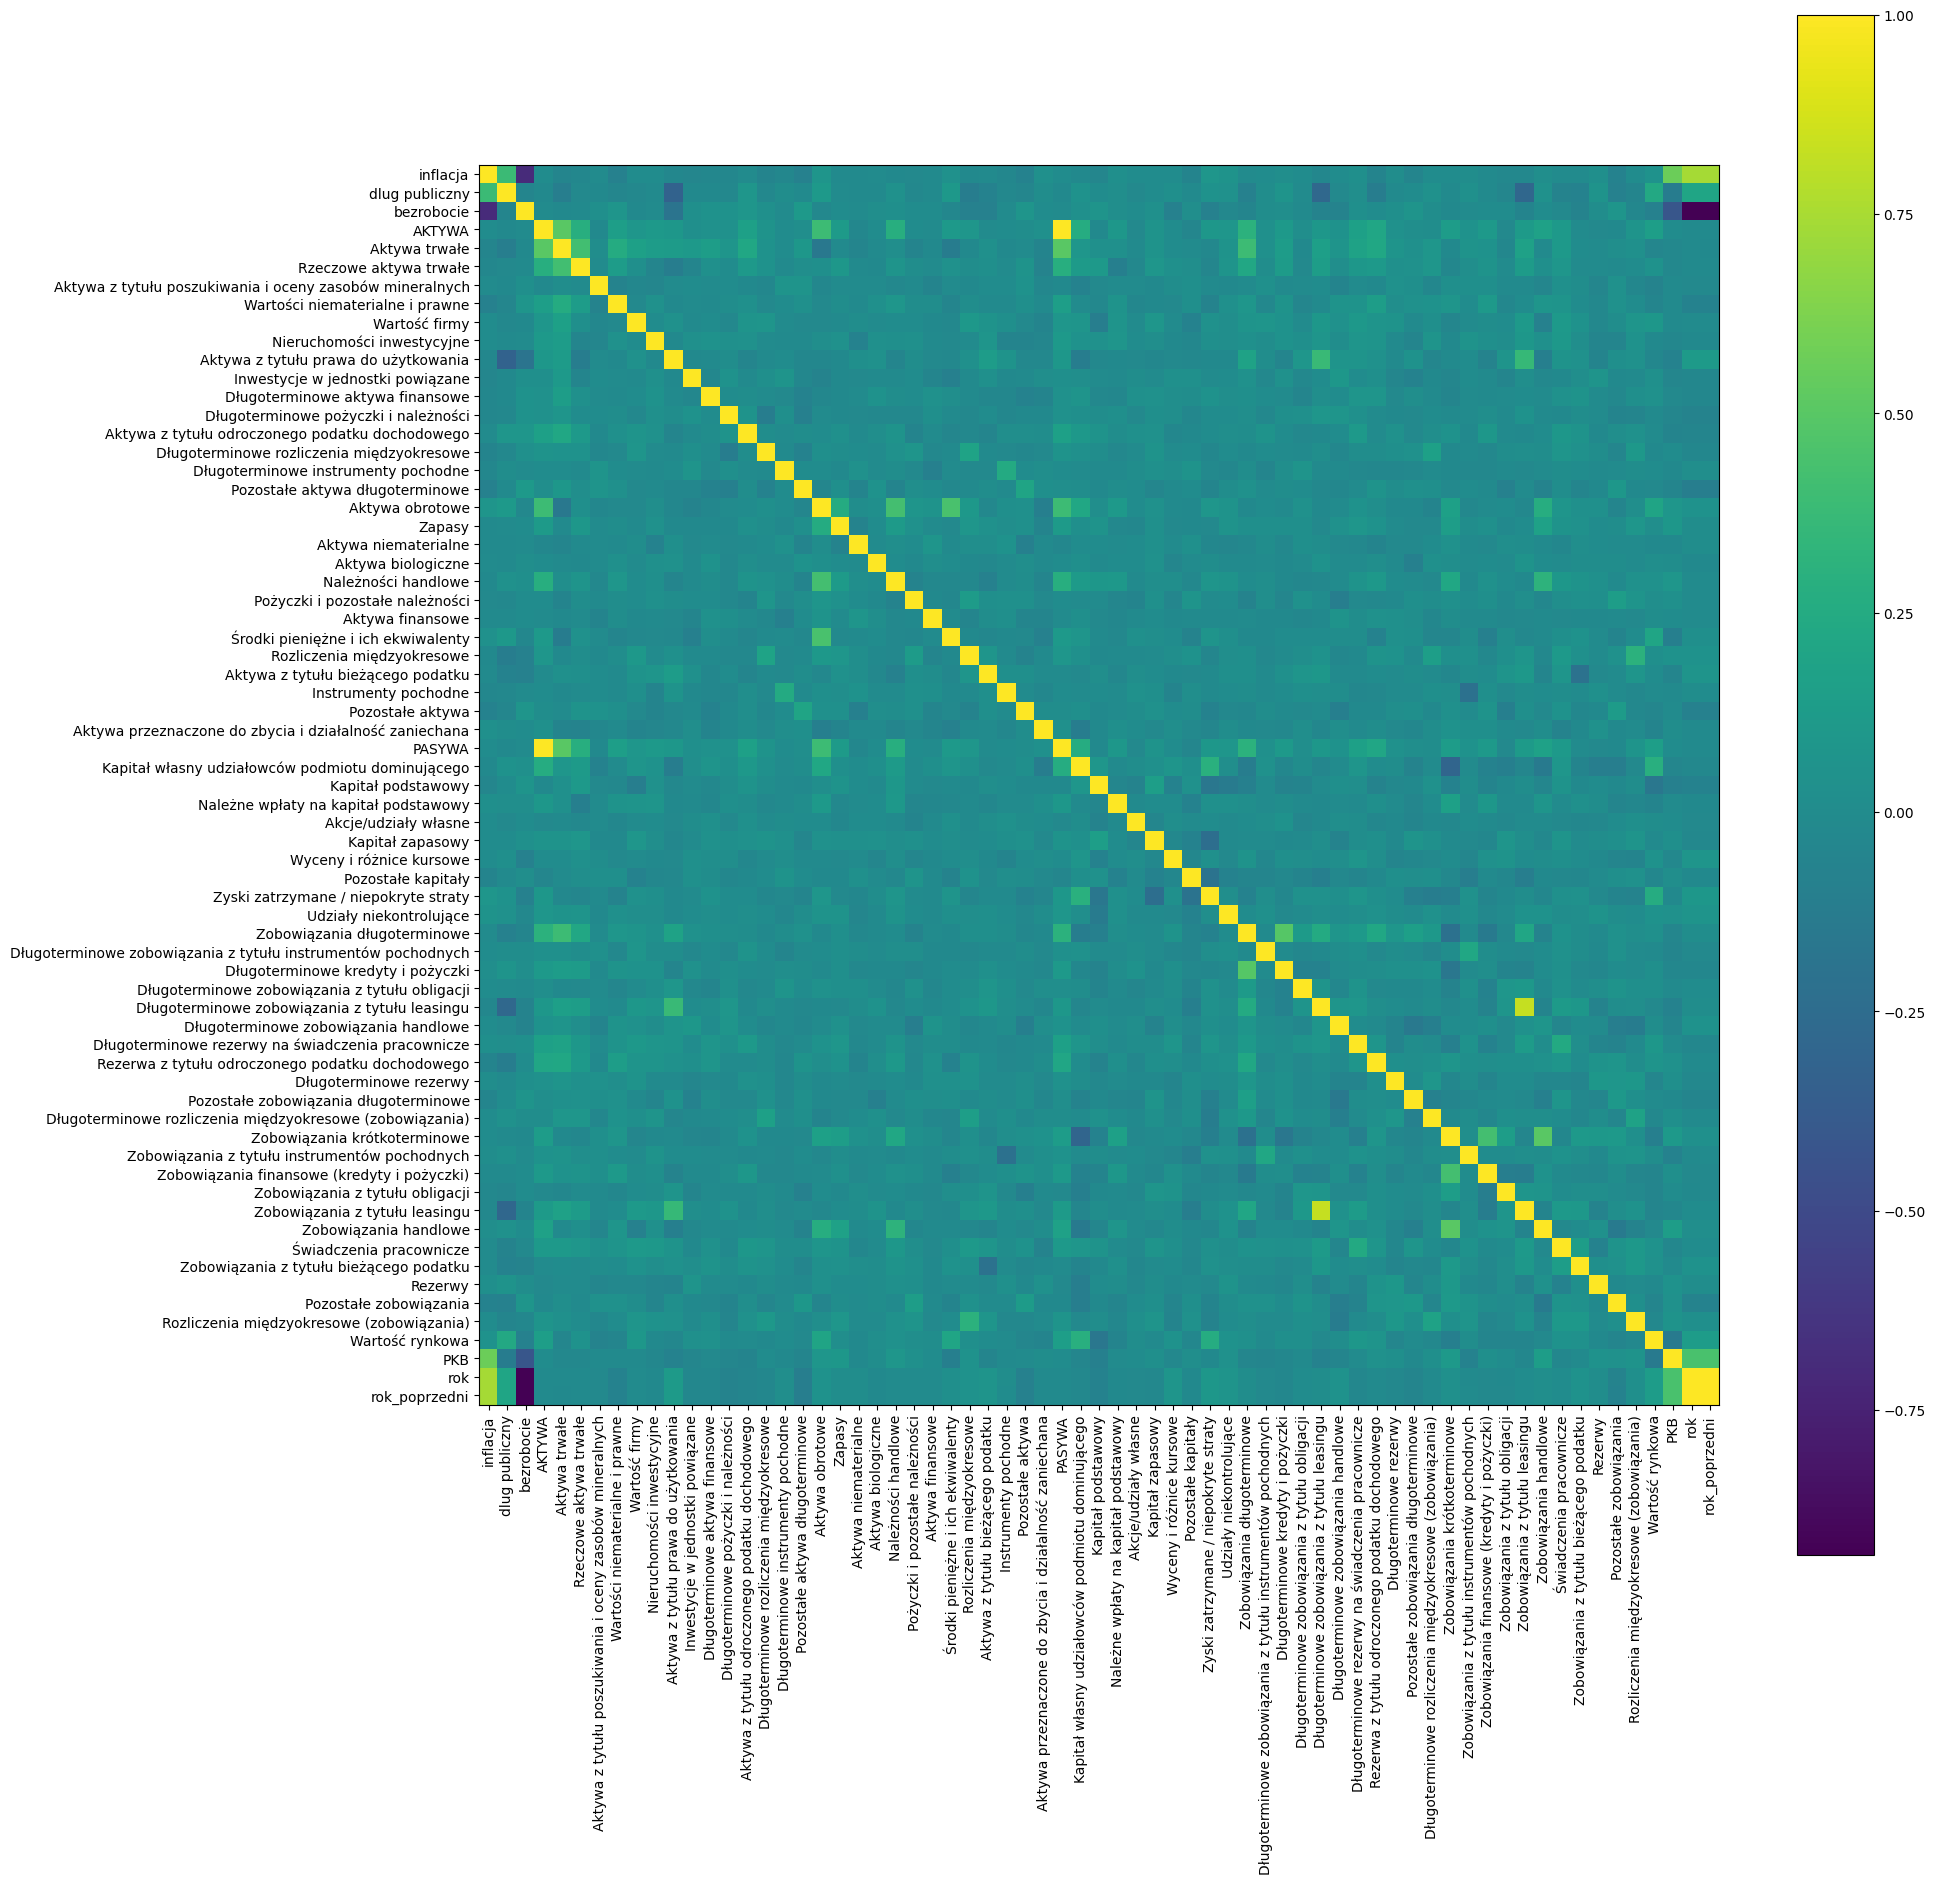

In [33]:
import matplotlib.pyplot as plt

df = df.drop("Nazwa firmy", axis = 1)
df = df.drop('Data bilansowa', axis = 1)
df = df.drop('Sektor', axis = 1)
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
heatmap = ax.imshow(correlation_matrix)
plt.colorbar(heatmap)
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)
plt.xticks(rotation=90)
plt.show()

In [34]:
# onehot_part = pd.get_dummies(df_diff.Sektor, prefix='Sektor')
# onehot_part.head(20)
# df_data = pd.concat([df_diff, onehot_part], axis=1)
df_data = df_diff.copy()
df_data = pd.get_dummies(df_data, columns=['Sektor', ], dtype = float)
# del df_data['Sektor']
# onehot_part = pd.get_dummies(df_diff['Data bilansowa'], prefix='Data')
# onehot_part.head(20)
# df_data = pd.concat([df_diff, onehot_part], axis=1)
# del df_data['Data bilansowa']
df_data['rok'] = df_data['rok'] - 1990
df_data.head(20)

,Nazwa firmy,Data bilansowa,inflacja,dlug publiczny,bezrobocie,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Wartość rynkowa,PKB,rok,rok_poprzedni,Sektor_artykuły codziennego użytku,Sektor_artykuły elektryczne,Sektor_artykuły spożywcze i szybkozbywalne,Sektor_biotechnologia,Sektor_biura podróży,Sektor_budownictwo - pozostałe,Sektor_budownictwo ogólne,Sektor_budownictwo przemysłowe,Sektor_chemia podstawowa,Sektor_chemia specjalistyczna,Sektor_chemikalia,Sektor_dystrybucja leków,Sektor_dystrybucja paliw i gazu,Sektor_elektronika użytkowa,Sektor_energetyka,Sektor_energia odnawialna,Sektor_gry,Sektor_górnictwo metali,Sektor_górnictwo węgla,Sektor_handel hurtowy - pozostałe,Sektor_handel i usługi - pozostałe,Sektor_hotele i restauracje,Sektor_hutnictwo metali nieżelaznych,Sektor_hutnictwo żelaza i stali,Sektor_informatyka - pozostałe,Sektor_instalacje budowlane i telekomunikacyjne,Sektor_inżynieria lądowa i wodna,Sektor_komputery i elektronika,Sektor_kosmetyki i chemia gospodarcza,Sektor_materiały budowlane,Sektor_meble i dywany,Sektor_motoryzacja - pozostałe,Sektor_napoje,Sektor_nowe technologie,Sektor_ochrona zdrowia - pozostałe,Sektor_odzież i kosmetyki - pozostałe,Sektor_odzież i obuwie,Sektor_oprogramowanie,Sektor_paliwa i gaz - pozostałe,Sektor_papier i opakowania,Sektor_portale internetowe,Sektor_produkcja leków,Sektor_produkcja rolna i rybołówstwo,Sektor_recykling,Sektor_reklama i marketing,Sektor_rekreacja i wypoczynek - pozostałe,Sektor_sprzedaż nieruchomości,Sektor_sprzęt elektryczny i elektroniczny,Sektor_sprzęt i materiały medyczne,Sektor_sprzęt informatyczny,Sektor_systemy informatyczne,Sektor_szpitale i przychodnie,Sektor_telekomunikacja,Sektor_transport,Sektor_transport i logistyka - pozostałe,Sektor_tworzywa sztuczne,Sektor_urządzenia elektryczne,Sektor_urządzenia mechaniczne,Sektor_usługi dla przedsiębiorstw,Sektor_wydawnictwa,Sektor_wydobycie i produkcja,Sektor_wyroby hutnicze,Sektor_wyroby metalowe,Sektor_zaopatrzenie - pozostałe,Sektor_środki transportu,Sektor_żywność
0,11BIT,2016-12-31,-0.009,0.543,0.102,0.000000,-0.035363,0.245217,0.0,-0.114773,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.914065,0.000000,0.0,0.256131,-0.026008

In [35]:
def to_class(y, n = 7):
    if y < 0: return 0
    return 1

In [36]:
from sklearn.model_selection import train_test_split
df_learn = df_data.copy()
market_value = df_learn['Wartość rynkowa']
y = market_value.to_numpy()
for i in range(y.shape[0]):
    y[i] = to_class(y[i])
df_learn = df_learn.drop('Wartość rynkowa', axis = 1)
df_learn['Wartość rynkowa'] = market_value
df_learn['index'] = df_learn['Nazwa firmy'].astype('category').cat.codes
# df_learn = df_learn.drop('rok', axis = 1)
df_learn = df_learn.drop('rok_poprzedni', axis = 1)
df_learn = df_learn.drop('Nazwa firmy', axis = 1)
df_learn = df_learn.drop('Data bilansowa', axis = 1)
df_learn.head(5)

,inflacja,dlug publiczny,bezrobocie,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),PKB,rok,Sektor_artykuły codziennego użytku,Sektor_artykuły elektryczne,Sektor_artykuły spożywcze i szybkozbywalne,Sektor_biotechnologia,Sektor_biura podróży,Sektor_budownictwo - pozostałe,Sektor_budownictwo ogólne,Sektor_budownictwo przemysłowe,Sektor_chemia podstawowa,Sektor_chemia specjalistyczna,Sektor_chemikalia,Sektor_dystrybucja leków,Sektor_dystrybucja paliw i gazu,Sektor_elektronika użytkowa,Sektor_energetyka,Sektor_energia odnawialna,Sektor_gry,Sektor_górnictwo metali,Sektor_górnictwo węgla,Sektor_handel hurtowy - pozostałe,Sektor_handel i usługi - pozostałe,Sektor_hotele i restauracje,Sektor_hutnictwo metali nieżelaznych,Sektor_hutnictwo żelaza i stali,Sektor_informatyka - pozostałe,Sektor_instalacje budowlane i telekomunikacyjne,Sektor_inżynieria lądowa i wodna,Sektor_komputery i elektronika,Sektor_kosmetyki i chemia gospodarcza,Sektor_materiały budowlane,Sektor_meble i dywany,Sektor_motoryzacja - pozostałe,Sektor_napoje,Sektor_nowe technologie,Sektor_ochrona zdrowia - pozostałe,Sektor_odzież i kosmetyki - pozostałe,Sektor_odzież i obuwie,Sektor_oprogramowanie,Sektor_paliwa i gaz - pozostałe,Sektor_papier i opakowania,Sektor_portale internetowe,Sektor_produkcja leków,Sektor_produkcja rolna i rybołówstwo,Sektor_recykling,Sektor_reklama i marketing,Sektor_rekreacja i wypoczynek - pozostałe,Sektor_sprzedaż nieruchomości,Sektor_sprzęt elektryczny i elektroniczny,Sektor_sprzęt i materiały medyczne,Sektor_sprzęt informatyczny,Sektor_systemy informatyczne,Sektor_szpitale i przychodnie,Sektor_telekomunikacja,Sektor_transport,Sektor_transport i logistyka - pozostałe,Sektor_tworzywa sztuczne,Sektor_urządzenia elektryczne,Sektor_urządzenia mechaniczne,Sektor_usługi dla przedsiębiorstw,Sektor_wydawnictwa,Sektor_wydobycie i produkcja,Sektor_wyroby hutnicze,Sektor_wyroby metalowe,Sektor_zaopatrzenie - pozostałe,Sektor_środki transportu,Sektor_żywność,Wartość rynkowa,index
0,-0.009,0.543,0.102,0.0,-0.035363,0.245217,0.0,-0.114773,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.914065,0.0,0.0,0.256131,-0.026008,0.000000,0.0,0.0,0.362517,0.0,0.000000,-0.092979,0.0,0.000000,

**Uczenie gęstopołączonych sieci neuronowych**

In [37]:
X = df_learn.to_numpy()[:,:-2]
print(X.shape, y.shape)
print(X[0], y[0])
for i in range(131):
    print(i, X[0][i])

(1271, 131) (1271,)
[-0.009000000000000001 0.543 0.102 0.0 -0.035363061164413824
 0.2452174698116356 0.0 -0.11477278919509597 0.0 0.0 0.0 0.0 0.0 0.0
 0.9140652352990509 0.0 0.0 0.2561309384453999 -0.026008190556265572 0.0
 0.0 0.0 0.36251676885499456 0.0 0.0 -0.09297880453582978 0.0 0.0 0.0
 1.1791546299220041 2.0 0.0 0.05455718785742226 -0.3270510775536489 0.0
 0.0 0.23036787232512307 1.0922030630882238 1.0192578163153199
 -0.3122432555439577 0.0 -0.5642640651259065 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 -0.5642640651259065 -0.5942020917645199 0.0 0.0 0.0 0.0
 -0.16298656253446567 0.0 -1.0446873166931792 0.0 0.0 -1.1856666029397747
 -0.014993136944356503 26 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0] 1
0 -0.009000000000000001
1 0.543
2 0.102
3 0.0
4 -0.0353630611644

**Przygotowanie danych**

In [38]:
company_number = df_learn['index'].max()

def extract_company_time_series(df, index, look_back = 5):
    df.sort_values(by=['rok'], ascending=False)
    df_time_series = df.loc[df['index'] == index]
    # return df_time_series.head(look_back).to_numpy()
    return df_time_series

In [39]:
extract_company_time_series(df_learn, 4, 5)

,inflacja,dlug publiczny,bezrobocie,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),PKB,rok,Sektor_artykuły codziennego użytku,Sektor_artykuły elektryczne,Sektor_artykuły spożywcze i szybkozbywalne,Sektor_biotechnologia,Sektor_biura podróży,Sektor_budownictwo - pozostałe,Sektor_budownictwo ogólne,Sektor_budownictwo przemysłowe,Sektor_chemia podstawowa,Sektor_chemia specjalistyczna,Sektor_chemikalia,Sektor_dystrybucja leków,Sektor_dystrybucja paliw i gazu,Sektor_elektronika użytkowa,Sektor_energetyka,Sektor_energia odnawialna,Sektor_gry,Sektor_górnictwo metali,Sektor_górnictwo węgla,Sektor_handel hurtowy - pozostałe,Sektor_handel i usługi - pozostałe,Sektor_hotele i restauracje,Sektor_hutnictwo metali nieżelaznych,Sektor_hutnictwo żelaza i stali,Sektor_informatyka - pozostałe,Sektor_instalacje budowlane i telekomunikacyjne,Sektor_inżynieria lądowa i wodna,Sektor_komputery i elektronika,Sektor_kosmetyki i chemia gospodarcza,Sektor_materiały budowlane,Sektor_meble i dywany,Sektor_motoryzacja - pozostałe,Sektor_napoje,Sektor_nowe technologie,Sektor_ochrona zdrowia - pozostałe,Sektor_odzież i kosmetyki - pozostałe,Sektor_odzież i obuwie,Sektor_oprogramowanie,Sektor_paliwa i gaz - pozostałe,Sektor_papier i opakowania,Sektor_portale internetowe,Sektor_produkcja leków,Sektor_produkcja rolna i rybołówstwo,Sektor_recykling,Sektor_reklama i marketing,Sektor_rekreacja i wypoczynek - pozostałe,Sektor_sprzedaż nieruchomości,Sektor_sprzęt elektryczny i elektroniczny,Sektor_sprzęt i materiały medyczne,Sektor_sprzęt informatyczny,Sektor_systemy informatyczne,Sektor_szpitale i przychodnie,Sektor_telekomunikacja,Sektor_transport,Sektor_transport i logistyka - pozostałe,Sektor_tworzywa sztuczne,Sektor_urządzenia elektryczne,Sektor_urządzenia mechaniczne,Sektor_usługi dla przedsiębiorstw,Sektor_wydawnictwa,Sektor_wydobycie i produkcja,Sektor_wyroby hutnicze,Sektor_wyroby metalowe,Sektor_zaopatrzenie - pozostałe,Sektor_środki transportu,Sektor_żywność,Wartość rynkowa,index
24,0.007,0.508,0.139,0.0,-0.067202,-0.213894,0.0,1.965380,0.0,2.000000,0.0,0.0,2.000000,0.000000,2.000000,0.0,0.0,0.625505,0.296332,0.075374,0.0,2.000000,-0.055943,0.0,0.0,0.759334,0.0,0.0,0.0,0.0,0.0,0.0

In [40]:
import numpy as np

def find_indeces_to_extract(df, look_back = 5):
    value_map = df.sort_values(by=['index']).groupby('index')['index'].count()
    companies = []
    for i in range(len(value_map)):
        if value_map[i] > look_back:
            companies.append(i)
    return companies

def extract_all_time_series(df, look_back = 5):
    companies = find_indeces_to_extract(df, look_back = look_back)
    time_series_array = []
    for company in companies:
        # time_series_array.append(extract_company_time_series(df_learn, company, look_back))
        company_df = extract_company_time_series(df_learn, company, look_back)
        print(company_df.shape)
        for i in range(len(company_df) - look_back):
            time_series_array.append(company_df.head(i + look_back).tail(look_back).to_numpy())
    return np.array(time_series_array)

In [41]:
column_names = list(df_learn.columns[3:63])
column_names

['AKTYWA',
 'Aktywa trwałe',
 'Rzeczowe aktywa trwałe',
 'Aktywa z tytułu poszukiwania i oceny zasobów mineralnych',
 'Wartości niematerialne i prawne',
 'Wartość firmy',
 'Nieruchomości inwestycyjne',
 'Aktywa z tytułu prawa do użytkowania',
 'Inwestycje w jednostki powiązane',
 'Długoterminowe aktywa finansowe',
 'Długoterminowe pożyczki i należności',
 'Aktywa z tytułu odroczonego podatku dochodowego',
 'Długoterminowe rozliczenia międzyokresowe',
 'Długoterminowe instrumenty pochodne',
 'Pozostałe aktywa długoterminowe',
 'Aktywa obrotowe',
 'Zapasy',
 'Aktywa niematerialne',
 'Aktywa biologiczne',
 'Należności handlowe',
 'Pożyczki i pozostałe należności',
 'Aktywa finansowe',
 'Środki pieniężne i ich ekwiwalenty',
 'Rozliczenia międzyokresowe',
 'Aktywa z tytułu bieżącego podatku',
 'Instrumenty pochodne',
 'Pozostałe aktywa',
 'Aktywa przeznaczone do zbycia i działalność zaniechana',
 'PASYWA',
 'Kapitał własny udziałowców podmiotu dominującego',
 'Kapitał podstawowy',
 'Należne

In [42]:
data = extract_all_time_series(df_learn, look_back = 5)

(8, 133)
(6, 133)
(8, 133)
(6, 133)
(7, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(7, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(8, 133)
(8, 133)
(6, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(6, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(8, 133)
(7, 133)
(8, 133)
(8, 133)
(6, 133)
(8, 133)
(7, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(8, 133)
(8, 133)
(7, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(6, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(6, 133)
(8, 133)
(6, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(8, 133)
(7, 133)
(8, 133)
(7, 133)
(8, 133)
(8, 133)
(8, 133)
(6, 133)
(8, 133)
(7, 133)
(7, 133)
(8, 133)
(

In [43]:
def extract_X_y(data):
    look_back = data[0].shape[0]
    length = data[0].shape[1]
    X, y = [], []
    for x in data:
        x_modified = x[:,:-2]
        v = x[look_back - 1][length - 2]
        X.append(x_modified)
        y.append(v)
    return np.array(X), np.array(y)

In [44]:
X, y = extract_X_y(data)

In [45]:
print(X.shape, y.shape)

(378, 5, 131) (378,)


In [46]:
def get_std(X_in):
    m = X_in.shape[1]
    k = X_in.shape[2]
    std_X = np.zeros((m, k))
    for i in range(m):
        for j in range(k):
            std_X[i][j] = np.std(X_in[:,i,j])
    return std_X

def augment(X_in, y_in, coeff = 1.0, scale = 0.1):
    n = X.shape[0]
    std_X = get_std(X_in)
    X_aug, y_aug = [], []
    for _ in range(int(coeff * n)):
        idx = np.random.randint(0, n)
        X_aug.append(X_in[idx] + scale * np.random.normal(0, std_X))
        y_aug.append(y_in[idx])
    return X_aug, y_aug

In [47]:
X_aug, y_aug = augment(X, y, coeff = 1.0, scale = 0.1)
X, y = np.append(X, X_aug, axis = 0), np.append(y, y_aug, axis = 0)

In [48]:
print(X.shape)
print(X[0][0])
print(X[4][0])

(756, 5, 131)
[0.006999999999999999 0.508 0.139 0.0 0.07807505436964254
 0.10070262113291627 0.0 0.09428823002919012 -0.012663627672812454
 -0.23514346416396603 0.0 -0.15575945352543796 0.0 -0.2578580971758042
 1.7841221102814147 0.0 0.0 0.0 -0.012071860118177428 0.16330003413651004
 0.0 0.0 -0.2372628967466869 0.0 -1.8628860699311862 0.8208161556638108
 0.0 0.30784145670853064 0.0 0.0 0.0 0.0 -0.09338460492491556
 -0.23514346416396595 0.0 0.0 -0.23514346416396603 0.11547943507975982
 -0.3972714841982198 -0.018293989177570483 -1.5607652494685014
 1.738464368231449 0.0 1.866418250369796 0.0 0.0 -2.0 0.0
 0.5364203018315897 0.0 0.0 0.0 -0.09456286836552572 -2.0
 0.6422615288608576 0.0 0.0 -0.21174662602506247 0.047401431785054404
 -0.694327936397372 0.0 0.0 0.0 0.044174803298891015 24 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

**Przygotowanie danych do MOAE**

In [49]:
X_input = X[:,:,:-4]
print(X_input.shape)

(756, 5, 127)


In [50]:
X_ready = []
for x in X_input:
    X_ready.append(np.concatenate((x[0], x[1], x[2], x[3], x[4])))
X_ready = np.array(X_ready)
X_ready[1].shape

(635,)

**Funkcje celu**

In [51]:
def divide(old, new):
    aver = abs(max(0.000001, abs(old) + abs(new)) / 2)
    differ = new - old
    if differ < 0.000001 and differ > -0.000001:
        differ = 0.0
    return differ / aver

new_dict = dict()
for year in range(1996, 2023):
    new_dict[year] = [divide(statistics_dict[year-1][0], statistics_dict[year][0]),
                      divide(statistics_dict[year-1][1], statistics_dict[year][1]),
                      divide(statistics_dict[year-1][2], statistics_dict[year][2]),
                      divide(statistics_dict[year-1][3], statistics_dict[year][3])]
print(new_dict)

{1996: [-0.11555555555555562, 0.11834710743801638, -0.02547770700636945, -0.42401500938086295], 1997: [-0.0023612750885478495, -0.00500625782227774, -0.17543859649122806, -0.1649484536082474], 1998: [-0.09665427509293678, 0.09158934450763234, -0.2033898305084746, -0.2675159235668791], 1999: [0.015503875968992284, -0.027270089933275246, 0.11555555555555562, -0.6666666666666667], 2000: [-0.06622516556291391, 0.012857977790765569, 0.16216216216216214, 0.3905325443786982], 2001: [0.021680216802167945, 0.10300192784356935, 0.12080536912751683, -0.3085714285714285], 2002: [0.11378002528445007, 0.042051282051281995, 0.1411764705882352, -0.7155963302752294], 2003: [0.10859728506787339, 0.08970976253298162, 0.12853470437017994, -1.5897435897435899], 2004: [-0.03271537622682661, 0.15775005286529914, -0.0048426150121064345, 1.2000000000000002], 2005: [0.03271537622682661, 0.1817533856022809, -0.060000000000000143, 0.7924528301886792], 2006: [0.01490947816826402, 0.11833410173659135, -0.0748663101

In [52]:
def substitute(x, new_dict, year):
    x_new = np.concatenate((x[3:63], np.array([new_dict[year][0], new_dict[year][1], new_dict[year][2], new_dict[year][3]]), x[64:]))
    return x_new[:131].astype(np.float32).reshape((1, 131))

def take_to_elim(x, new_dict, year):
    x_new = np.concatenate((x[3:63], x[64:]))
    return x_new[:127].astype(np.float32).reshape((1, 127))

In [53]:
# k1, k2, k3, k4 = 0, 0, 0, 0
# year = 2019
# for i in range(100):
#     if model1(np.concatenate((X_ready[i][:127], np.array(statistics_dict[year]))).astype(np.float32).reshape((1, 131)))[0][0] > 0.5:
#         if model2(np.concatenate((X_ready[i][:127], np.array(statistics_dict[year]))).astype(np.float32).reshape((1, 131)))[0][0] > 0.0:
#             print("TAK")
#             k1 += 1
#         else:
#             print("NIE")
#             k2 += 1
#     else:
#         if model2(np.concatenate((X_ready[i][:127], np.array(statistics_dict[year]))).astype(np.float32).reshape((1, 131)))[0][0] <= 0.0:
#             print("TAK")
#             k3 += 1
#         else:
#             print("NIE")
#             k4 += 1
#     print(model1(np.concatenate((X_ready[i][:127], np.array(statistics_dict[year]))).astype(np.float32).reshape((1, 131)))[0][0], model2(np.concatenate((X_ready[i][:127], np.array(statistics_dict[year]))).astype(np.float32).reshape((1, 131)))[0][0])

# print(f"{k1 / 100}\%")
# print(f"{k2 / 100}\%")
# print(f"{k3 / 100}\%")
# print(f"{k4 / 100}\%")

# for i in range(5):
#     # print(model1(X_ready[i][0:131].astype(np.float32).reshape((1, 131)))[0][0])
#     print(model1(substitute(X_ready[i], new_dict, 2017))[0][0])
#     # print(model2(X_ready[i][0:131].astype(np.float32).reshape((1, 131)))[0][0])
#     print(model2(substitute(X_ready[i], new_dict, 2017))[0][0])
#     print()

# k1, k2, k3, k4 = 0, 0, 0, 0
# year = 2021
# for i in range(100):
#     if model1(np.concatenate((np.array(statistics_dict[year]), X_ready[i][4:131])).astype(np.float32).reshape((1, 131)))[0][0] > 0.5:
#         if model2(np.concatenate((np.array(statistics_dict[year]), X_ready[i][4:131])).astype(np.float32).reshape((1, 131)))[0][0] > 0.0:
#             print("TAK")
#             k1 += 1
#         else:
#             print("NIE")
#             k2 += 1
#     else:
#         if model2(np.concatenate((np.array(statistics_dict[year]), X_ready[i][4:131])).astype(np.float32).reshape((1, 131)))[0][0] <= 0.0:
#             print("TAK")
#             k3 += 1
#         else:
#             print("NIE")
#             k4 += 1
#     print(model1(np.concatenate((np.array(statistics_dict[year]), X_ready[i][4:131])).astype(np.float32).reshape((1, 131)))[0][0], model2(np.concatenate((np.array(statistics_dict[year]), X_ready[i][4:131])).astype(np.float32).reshape((1, 131)))[0][0])

# print(f"{k1 / 100}\%")
# print(f"{k2 / 100}\%")
# print(f"{k3 / 100}\%")
# print(f"{k4 / 100}\%")

In [54]:
n = 5
s_1 = 15
s_2 = 127

macroeconomy_conditions = np.array([
    [0, 10, -0.2, 0.95],
    [-0.2, 9, 0.17, 0.91],
    [-0.3, 8, 0.11, 0.89],
    [-0.25, 8, 0.34, 0.88],
    [0.15, -8.5, -0.23, 0.88]
])

In [55]:
import numpy as np


def f1(x):
    return 1 - model1(substitute(x, new_dict, 2021))[0]

def f2(x):
    return -model2(substitute(x, new_dict, 2021))[0]

def f3(x):
    x_all = [0] * n
    for i in range(n):
        x_all[i] = np.concatenate((x[s_2*i:s_2*(i+1)], macroeconomy_conditions[i]))
    return 1 - model3(np.array(x_all).astype(np.float32).reshape((1, 5, 131)))[0]

def f4(x):
    x_all = [0] * n
    for i in range(n):
        x_all[i] = np.concatenate((x[s_2*i:s_2*(i+1)], macroeconomy_conditions[i]))
    return -model4(np.array(x_all).astype(np.float32).reshape((1, 5, 131)))[0]

def c1(x):
    return model5.predict(take_to_elim(X_ready[i], new_dict, 2021))[0] == 1

In [56]:
pca_model = PCA(n_components=2).fit(X_ready.astype(np.float32))

In [57]:
s = np.sum(X_ready[0:378,65:127], axis = 0)

X_sector_1 = X_ready[X_ready[:,94] == 1]
X_sector_2 = X_ready[X_ready[:,122] == 1]
X_sector_3 = X_ready[X_ready[:,101] == 1]
X_sector_4 = X_ready[X_ready[:,115] == 1]

X_sector_1 = np.concatenate([X_sector_1, X_sector_1, X_sector_1, X_sector_1, X_sector_1, X_sector_1])
X_sector_2 = np.concatenate([X_sector_2, X_sector_2, X_sector_2, X_sector_2, X_sector_2, X_sector_2])
X_sector_3 = np.concatenate([X_sector_3, X_sector_3, X_sector_3, X_sector_3, X_sector_3, X_sector_3])
X_sector_4 = np.concatenate([X_sector_4, X_sector_4, X_sector_4, X_sector_4, X_sector_4, X_sector_4])

**Scenariusze gospodarcze**

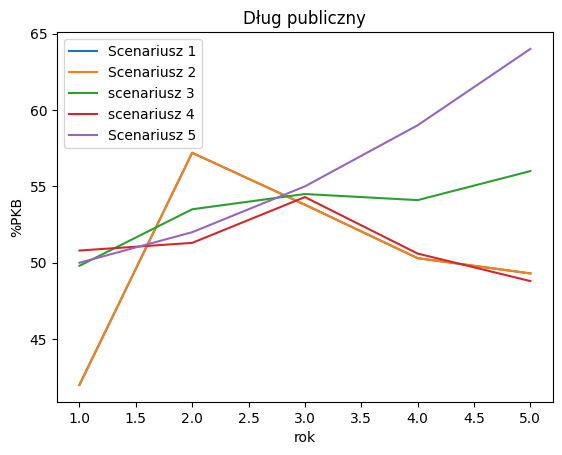

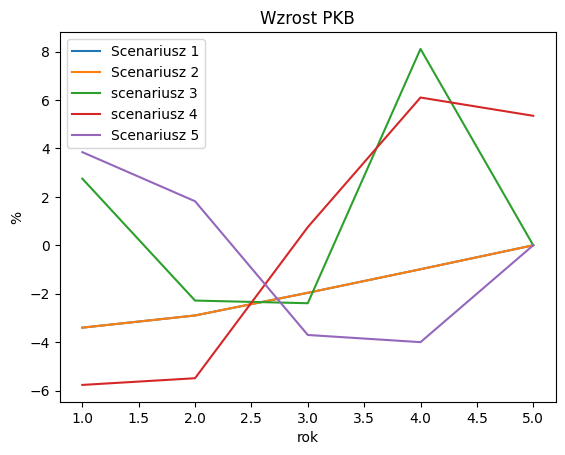

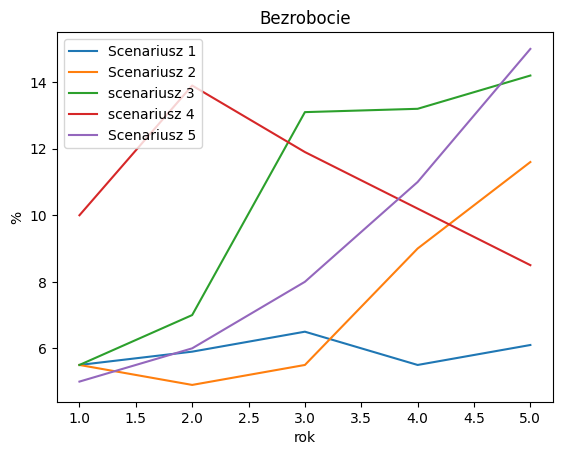

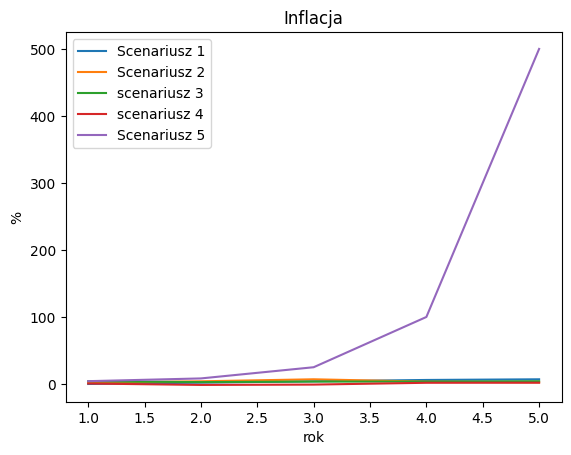

In [58]:
import numpy as np
import matplotlib.pyplot as plt

scenario_1 = np.array([
    [49.3, 722.0, 6.1, 7.0],
    [50.3, 674.5, 5.5, 6.0],
    [53.8, 636.5, 6.5, 4.0],
    [57.2, 612.0, 5.9, 2.0],
    [42.0, 600.0, 5.5, 0.0]
])

scenario_2 = np.array([
    [49.3, 722.0, 11.6, 2.5],
    [50.3, 674.5,  9.0, 3.5],
    [53.8, 636.5,  5.5, 7.0],
    [57.2, 612.0,  4.9, 4.0],
    [42.0, 600.0,  5.5, 2.0]
])

scenario_3 = np.array([
    [56.0, 530.0, 14.2, 4.1],
    [54.1, 560.0, 13.2, 3.6],
    [54.5, 535.0, 13.1, 3.6],
    [53.5, 510.0,  7.0, 2.8],
    [49.8, 600.0,  5.5, 4.0]
])

scenario_4 = np.array([
    [48.8, 588.8,  8.5,  1.9],
    [50.6, 524.6, 10.2,  1.8],
    [54.3, 470.0, 11.9, -0.9],
    [51.3, 477.1, 13.9, -1.4],
    [50.8, 539.1, 10.0,  0.7]
])

scenario_5 = np.array([
    [64.0, 625.0, 15.0, 500.0],
    [59.0, 675.0, 11.0, 100.0],
    [55.0, 700.0,  8.0,  25.0],
    [52.0, 650.0,  6.0,   8.3],
    [50.0, 600.0,  5.0,   4.2]
])

def make_differences(scenario):
    y = np.zeros(5)
    y[0] = 100 * (600.0          - scenario[4][1]) / (600.0          + scenario[4][1])
    y[1] = 100 * (scenario[4][1] - scenario[3][1]) / (scenario[4][1] + scenario[3][1])
    y[2] = 100 * (scenario[3][1] - scenario[2][1]) / (scenario[3][1] + scenario[2][1])
    y[3] = 100 * (scenario[2][1] - scenario[1][1]) / (scenario[2][1] + scenario[1][1])
    y[4] = 100 * (scenario[1][1] - scenario[0][1]) / (scenario[1][1] + scenario[0][1])
    scenario[:, 1] = y
    new_scenario = np.zeros((5, 4))
    for i in range(5):
        new_scenario[i] = scenario[4-i]
    return new_scenario

scenario1 = make_differences(scenario_1)
scenario2 = make_differences(scenario_2)
scenario3 = make_differences(scenario_3)
scenario4 = make_differences(scenario_4)
scenario5 = make_differences(scenario_5)

# plt.set_title('Scenariusze')

plt.plot(np.linspace(1, 5, 5), scenario1.T[0])
plt.plot(np.linspace(1, 5, 5), scenario2.T[0])
plt.plot(np.linspace(1, 5, 5), scenario3.T[0])
plt.plot(np.linspace(1, 5, 5), scenario4.T[0])
plt.plot(np.linspace(1, 5, 5), scenario5.T[0])
plt.title('Dług publiczny')
plt.xlabel('rok')
plt.ylabel('%PKB')
plt.legend(["Scenariusz 1", "Scenariusz 2", "scenariusz 3", "scenariusz 4", "Scenariusz 5"])
plt.savefig("Dług publiczny.png")
plt.show()

plt.plot(np.linspace(1, 5, 5), scenario1.T[1])
plt.plot(np.linspace(1, 5, 5), scenario2.T[1])
plt.plot(np.linspace(1, 5, 5), scenario3.T[1])
plt.plot(np.linspace(1, 5, 5), scenario4.T[1])
plt.plot(np.linspace(1, 5, 5), scenario5.T[1])
plt.title('Wzrost PKB')
plt.xlabel('rok')
plt.ylabel('%')
plt.legend(["Scenariusz 1", "Scenariusz 2", "scenariusz 3", "scenariusz 4", "Scenariusz 5"])
plt.savefig("Wzrost PKB.png")
plt.show()

plt.plot(np.linspace(1, 5, 5), scenario1.T[2])
plt.plot(np.linspace(1, 5, 5), scenario2.T[2])
plt.plot(np.linspace(1, 5, 5), scenario3.T[2])
plt.plot(np.linspace(1, 5, 5), scenario4.T[2])
plt.plot(np.linspace(1, 5, 5), scenario5.T[2])
plt.title('Bezrobocie')
plt.xlabel('rok')
plt.ylabel('%')
plt.legend(["Scenariusz 1", "Scenariusz 2", "scenariusz 3", "scenariusz 4", "Scenariusz 5"])
plt.savefig("Bezrobocie.png")
plt.show()

plt.plot(np.linspace(1, 5, 5), scenario1.T[3])
plt.plot(np.linspace(1, 5, 5), scenario2.T[3])
plt.plot(np.linspace(1, 5, 5), scenario3.T[3])
plt.plot(np.linspace(1, 5, 5), scenario4.T[3])
plt.plot(np.linspace(1, 5, 5), scenario5.T[3])
plt.title('Inflacja')
plt.xlabel('rok')
plt.ylabel('%')
plt.legend(["Scenariusz 1", "Scenariusz 2", "scenariusz 3", "scenariusz 4", "Scenariusz 5"])
plt.savefig("Inflacja.png")
plt.show()

In [59]:
import numpy as np

n = 5
s_1 = 15
s_2 = 127

macroeconomy_conditions = np.array([
    [0, 10, -0.2, 0.95],
    [-0.2, 9, 0.17, 0.91],
    [-0.3, 8, 0.11, 0.89],
    [-0.25, 8, 0.34, 0.88],
    [0.15, -8.5, -0.23, 0.88]
])

def prepare(scenario):
    return [divide(scenario[1][0], scenario[0][0]),
            divide(scenario[1][1], scenario[0][1]),
            divide(scenario[1][2], scenario[0][2]),
            divide(scenario[1][3], scenario[0][3])]

def f1(x):
    return 1 - model1(substitute(x, {2021: prepare(scenario)}, 2021))[0]

def f2(x):
    return -model2(substitute(x, {2021: prepare(scenario)}, 2021))[0]

def f3(x):
    x_all = [0] * n
    for i in range(n):
        x_all[i] = np.concatenate((x[s_2*i:s_2*(i+1)], scenario[i]))
    return 1 - model3(np.array(x_all).astype(np.float32).reshape((1, 5, 131)))[0]

def f4(x):
    x_all = [0] * n
    for i in range(n):
        x_all[i] = np.concatenate((x[s_2*i:s_2*(i+1)], scenario[i]))
    return -model4(np.array(x_all).astype(np.float32).reshape((1, 5, 131)))[0]

def c1(x):
    return model5.predict(take_to_elim(X_ready[i], {2021: scenario[-1]}, 2021))[0] == 1

**Interpretacja wyników**

In [60]:
def interpret_results(population, name = "simulation"):
    pop_mean, pop_std, pop_min, pop_max = np.mean(population[:,:60], axis = 0), np.std(population[:,:60], axis = 0), np.min(population[:,:60], axis = 0), np.max(population[:,:60], axis = 0)
    xs = np.arange(60)
    plt.figure(figsize=(20, 10), dpi=80)
    plt.bar(xs, pop_mean)
    plt.errorbar(xs, pop_mean, yerr=pop_std, fmt="o", color="r")
    plt.xticks(np.arange(60), column_names, rotation = 90)
    plt.savefig(f"{name}_interpretation.png")
    plt.show()
    print(f"Według modelu {name} należy zredukować wartości następujących elementów struktury kapitałowo-majątkowej przedsiębiorstwa:")
    print("\\begin{itemize}")
    print(np.argpartition(pop_mean, 5)[:5].astype(int))
    for col in np.array(column_names)[np.argpartition(pop_mean, 5)[:5].astype(int)]:
        print(f"\\item {col}")
    print("\\end{itemize}")

    print(f"Według modelu {name} należy zwiększyć wartości następujących elementów struktury kapitałowo-majątkowej przedsiębiorstwa:")
    for col in np.array(column_names)[np.argpartition(-pop_mean, 5)[:5].astype(int)]:
        print(f"\\item {col}")
    print("\\end{itemize}")

**Scenariusz 1**

In [61]:
scenario = scenario_1

In [62]:
# moae = VEGA(X_ready.astype(np.float32), "vega_scenario1", [f1, f2, f3, f4], [c1], N = 100, T = 100, model = pca_model)
# res_pop = moae.run(False, True, 20)
# interpret_results(res_pop, "vega_scenario1")

**NSGA_3**

In [63]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=9fa7b63d973b8e16bdda2fde997ea71d7c8ba995f3d93c156a0e09e37019b29d
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


**Metody wizualizacji**

In [64]:
f_size = 24

def find_undominated(Xs, fs):
    n = Xs.shape[0]
    mask = np.ones(n)
    for i in range(n):
        for j in range(n):
            if fs[i][0] > fs[j][0] and fs[i][1] > fs[j][1] \
            and fs[i][2] > fs[j][2] and fs[i][3] > fs[j][3]:
                mask[i] = 0
    mask = np.ma.make_mask(mask.astype(int))
    return mask

def draw_population(Xs, fs, t = 100, name = "nsga"):
    model = PCA().fit(Xs)
    plt.xlabel('pca_component_1')
    plt.ylabel('pca_component_2')
    plt.title(f"Population - {t} epochs")
    X_pca = model.transform(Xs)
    x_max, x_min, y_max, y_min = np.max(X_pca[:,0]), np.min(X_pca[:,0]), np.max(X_pca[:,1]), np.min(X_pca[:,1])
    plt.scatter(X_pca[:,0], X_pca[:,1], color = 'black', s = 20)

    undominated = Xs[find_undominated(Xs, fs)]
    undominated_pca = model.transform(undominated)
    plt.scatter(undominated_pca[:,0], undominated_pca[:,1], color = 'red', s = 20)

    x_mean = (x_min + x_max) / 2
    x_range = (x_max - x_min) / 2
    y_mean = (y_min + y_max) / 2
    y_range = (y_max - y_min) / 2
    plt.xlim((x_mean - 1.21 * x_range, x_mean + 1.21 * x_range))
    plt.ylim((y_mean - 1.21 * y_range, y_mean + 1.21 * y_range))

    plt.legend(["dominated", "undominated", "external"])
    plt.grid()
    plt.savefig(f"{name}_population_{t}.png")
    plt.show()

def draw_function_values(Xs, fs, t = 100, name = "nsga"):
    c, n = 0, fs.shape[1] * (fs.shape[1] - 1) // 2
    fig, axs = plt.subplots(n // 2, 2, figsize = (40, 20))
    mask = find_undominated(Xs, fs)
    for i in range(fs.shape[1]):
        for j in range(i+1, fs.shape[1]):
            axs[c // 2, c % 2].set_title(f"Relation between function_{i+1} and function_{j+1}", fontsize = f_size)
            axs[c // 2, c % 2].scatter(fs[:,i], fs[:,j], color = 'black')
            axs[c // 2, c % 2].scatter(fs[mask,i], fs[mask,j], color = 'lime')
            axs[c // 2, c % 2].scatter(fs[:,i], fs[:,j], color = 'black')
            axs[c // 2, c % 2].scatter(fs[mask,i], fs[mask,j], color = 'lime')
            axs[c // 2, c % 2].grid()
            c += 1
    plt.savefig(f"{name}_functions_{t}.png")
    plt.show()

    df = pd.DataFrame(fs, columns=['f1', 'f2', 'f3', 'f4'])
    df['undominated'] = mask
    df = df.replace(True, "undominated")
    df = df.replace(False, "dominated")
    pd.plotting.andrews_curves(df.sort_values('undominated'), 'undominated', colormap = 'viridis')
    pd.plotting.andrews_curves(optimal_results.sort_values('undominated'), 'undominated', colormap = 'copper', linestyle = 'dashdot', linewidth = 2)
    plt.grid()
    plt.savefig(f"{name}_andrews_{t}.png")
    plt.show()

def draw_history(f_1, f_2, f_3, f_4, name = "nsga"):
    f_1, f_2, f_3, f_4 = np.array(f_1), np.array(f_2), np.array(f_3), np.array(f_4)
    n = f_1[:,0].shape[0]
    xs = np.linspace(1, n, num=n)

    fig, axs = plt.subplots(2, 2, figsize = (32, 16))

    for ax in axs.flat:
        ax.set(xlabel='epochs', ylabel='value')

    ys_1, ys_2, ys_3, ys_4 = f_1[:,0], f_1[:,1], f_1[:,2], f_1[:,3]
    axs[0, 0].set_title('Function 1', fontsize = f_size)
    axs[0, 0].plot(xs, ys_1)
    axs[0, 0].plot(xs, ys_2)
    axs[0, 0].xaxis.set_tick_params(labelsize=f_size)
    axs[0, 0].yaxis.set_tick_params(labelsize=f_size)
    axs[0, 0].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
    axs[0, 0].grid()

    ys_1, ys_2, ys_3, ys_4 = f_2[:,0], f_2[:,1], f_2[:,2], f_2[:,3]
    axs[0, 1].set_title('Function 2', fontsize = f_size)
    axs[0, 1].plot(xs, ys_1)
    axs[0, 1].plot(xs, ys_2)
    axs[0, 1].xaxis.set_tick_params(labelsize=f_size)
    axs[0, 1].yaxis.set_tick_params(labelsize=f_size)
    axs[0, 1].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
    axs[0, 1].grid()

    ys_1, ys_2, ys_3, ys_4 = f_3[:,0], f_3[:,1], f_3[:,2], f_3[:,3]
    axs[1, 0].set_title('Function 3', fontsize = f_size)
    axs[1, 0].plot(xs, ys_1)
    axs[1, 0].plot(xs, ys_2)
    axs[1, 0].xaxis.set_tick_params(labelsize=f_size)
    axs[1, 0].yaxis.set_tick_params(labelsize=f_size)
    axs[1, 0].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
    axs[1, 0].grid()

    ys_1, ys_2, ys_3, ys_4 = f_4[:,0], f_4[:,1], f_4[:,2], f_4[:,3]
    axs[1, 1].set_title('Function 4', fontsize = f_size)
    axs[1, 1].plot(xs, ys_1)
    axs[1, 1].plot(xs, ys_2)
    axs[1, 1].xaxis.set_tick_params(labelsize=f_size)
    axs[1, 1].yaxis.set_tick_params(labelsize=f_size)
    axs[1, 1].errorbar(xs, ys_3, ys_4, linestyle='None', marker='^')
    axs[1, 1].grid()

    plt.savefig(f"{name}_history.png")
    plt.show()

**NSGA III**

In [65]:
from pymoo.algorithms.moo.nsga3 import NSGA3
# from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions

import numpy as np
from pymoo.problems.functional import FunctionalProblem
from pymoo.core.mutation import Mutation
from pymoo.core.crossover import Crossover
from pymoo.core.population import Population
from pymoo.core.individual import Individual
from pymoo.core.callback import Callback

class MyMutation(Mutation):
    def __init__(self, std = 1.0, p_m = 0.5, s = 60, model = always_false, **kwargs):
        super().__init__(**kwargs)
        self.std = std
        self.p_m = p_m
        self.s = s
        self.model = model

    def _do(self, problem, X, **kwargs):
        print("mutate")
        X_new = []
        for x in X:
            if isinstance(x, Individual):
                X_new.append(x.X.astype(float))
            else:
                X_new.append(x.astype(float))
        X = np.array(X_new)
        Xp = mutate(X, self.std, p_m = self.p_m, s = self.s, model = self.model)
        return Xp

class MyCrossover(Crossover):
    def __init__(self, n_parents = 2, n_offsprings = 2, prob=0.5, **kwargs):
        super().__init__(n_parents, n_offsprings, **kwargs)
        self.n_parents = n_parents
        self.n_offsprings = n_offsprings
        self.prob = prob

    def do(self, problem, pop, parents=None, **kwargs):
        if parents is None:
            np.random.shuffle(pop)
            parents = np.arange(pop.shape[0])
        Xp = []
        for mating in parents:
            p_A, p_B = recombine(pop[mating][0], pop[mating][1], p_c = self.prob)
            Xp.extend([p_A, p_B])
        off = Population.new("X", Xp)
        return off

    def _do(self, problem, X, **kwargs):
        pass


class MyCallback(Callback):
    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []
        self.Xs = []
        self.Fs = []

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())
        self.Fs.append(algorithm.pop.get("F"))
        self.Xs.append(algorithm.pop.get("X"))

objs = [
    lambda x: f1(x),
    lambda x: f2(x),
    lambda x: f3(x),
    lambda x: f4(x)
]

constr_ieq = [
    lambda x: c1(x)
]

n_var = 635
n_epochs = 100

def solution(name = "nsga", Xs = X_ready.astype(np.float32)):
    problem = FunctionalProblem(n_var, objs, constr_ieq=constr_ieq, xl=np.ones(n_var) / 10, xu=np.ones(n_var) * 10)

    ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=2)

    algorithm = NSGA3(pop_size=100, sampling=Xs, ref_dirs=ref_dirs, mutation=MyMutation(), crossover=MyCrossover(), callback=MyCallback())
    # algorithm = NSGA2(pop_size=100, sampling=Xs, mutation=MyMutation(), crossover=MyCrossover(), callback=MyCallback())
    res = minimize(problem, algorithm, ('n_gen', n_epochs), seed=43, verbose=True)

    Xs_history = res.algorithm.callback.Xs
    Fs_history = res.algorithm.callback.Fs

    n_vis = 5
    for i in range(n_vis):
        idx = (i + 1) * n_epochs // 5 - 1
        Xs, fs = np.array(Xs_history[idx]), np.array(Fs_history[idx])
        draw_population(Xs, fs, t = idx, name = name)
        draw_function_values(Xs, fs, t = idx, name = name)

    fs, Xs = [], []
    n_pop = len(res.pop)
    for i in range(n_pop):
        fs.append(np.array(res.pop[i]._F))
        Xs.append(res.pop[i]._X)
    Xs, fs = np.array(Xs), np.array(fs)
    draw_population(Xs, fs, t = n_epochs, name = name)
    draw_function_values(Xs, fs, t = n_epochs, name = name)

    f1, f2, f3, f4 = [], [], [], []
    for fs in Fs_history:
        f1.append([np.min(fs[:,0]), np.max(fs[:,0]), np.mean(fs[:,0]), np.std(fs[:,0])])
        f2.append([np.min(fs[:,1]), np.max(fs[:,1]), np.mean(fs[:,1]), np.std(fs[:,1])])
        f3.append([np.min(fs[:,2]), np.max(fs[:,2]), np.mean(fs[:,2]), np.std(fs[:,2])])
        f4.append([np.min(fs[:,3]), np.max(fs[:,3]), np.mean(fs[:,3]), np.std(fs[:,3])])
    draw_history(f1, f2, f3, f4, name = name)

    interpret_results(Xs, name = name)

**Scenariusz 2**

In [66]:
scenario = scenario_2
solution("nsga_2_all")

Output hidden; open in https://colab.research.google.com to view.

**Scenariusz 3**

In [67]:
scenario = scenario_3
solution("nsga_3_all")

Output hidden; open in https://colab.research.google.com to view.

**Scenariusz 4**

In [68]:
scenario = scenario_4
solution("nsga_4_all")

Output hidden; open in https://colab.research.google.com to view.

**Scenariusz 5**

In [69]:
scenario = scenario_5
solution("nsga_5_all")

Output hidden; open in https://colab.research.google.com to view.

**Scenariusz 1**

In [70]:
scenario = scenario_1
solution("nsga_1_all")

Output hidden; open in https://colab.research.google.com to view.